In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
titanic = pd.read_csv('../data/titanic/train.csv')
titanic.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


to identified data type correctly need to examine `dtype` as well as data itself.<br>
in this case can use `dtypes` and then examine unique data points. this step needs<br>
int data can cast as `float` or `object`. also histogram can used for this.(to identify discrete or continues)

In [3]:
titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [4]:
pd.unique(titanic.Age)

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [5]:
pd.unique(titanic.Fare)

array([  7.25  ,  71.2833,   7.925 ,  53.1   ,   8.05  ,   8.4583,
        51.8625,  21.075 ,  11.1333,  30.0708,  16.7   ,  26.55  ,
        31.275 ,   7.8542,  16.    ,  29.125 ,  13.    ,  18.    ,
         7.225 ,  26.    ,   8.0292,  35.5   ,  31.3875, 263.    ,
         7.8792,   7.8958,  27.7208, 146.5208,   7.75  ,  10.5   ,
        82.1708,  52.    ,   7.2292,  11.2417,   9.475 ,  21.    ,
        41.5792,  15.5   ,  21.6792,  17.8   ,  39.6875,   7.8   ,
        76.7292,  61.9792,  27.75  ,  46.9   ,  80.    ,  83.475 ,
        27.9   ,  15.2458,   8.1583,   8.6625,  73.5   ,  14.4542,
        56.4958,   7.65  ,  29.    ,  12.475 ,   9.    ,   9.5   ,
         7.7875,  47.1   ,  15.85  ,  34.375 ,  61.175 ,  20.575 ,
        34.6542,  63.3583,  23.    ,  77.2875,   8.6542,   7.775 ,
        24.15  ,   9.825 ,  14.4583, 247.5208,   7.1417,  22.3583,
         6.975 ,   7.05  ,  14.5   ,  15.0458,  26.2833,   9.2167,
        79.2   ,   6.75  ,  11.5   ,  36.75  ,   7.7958,  12.5

In [6]:
pd.unique(titanic.Sex)

array(['male', 'female'], dtype=object)

In [7]:
pd.unique(titanic.Ticket)

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [8]:
pd.unique(titanic.Cabin), pd.unique(titanic.Embarked)

(array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
        'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
        'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
        'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
        'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
        'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
        'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
        'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
        'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
        'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
        'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
        'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
        'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
        'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
   

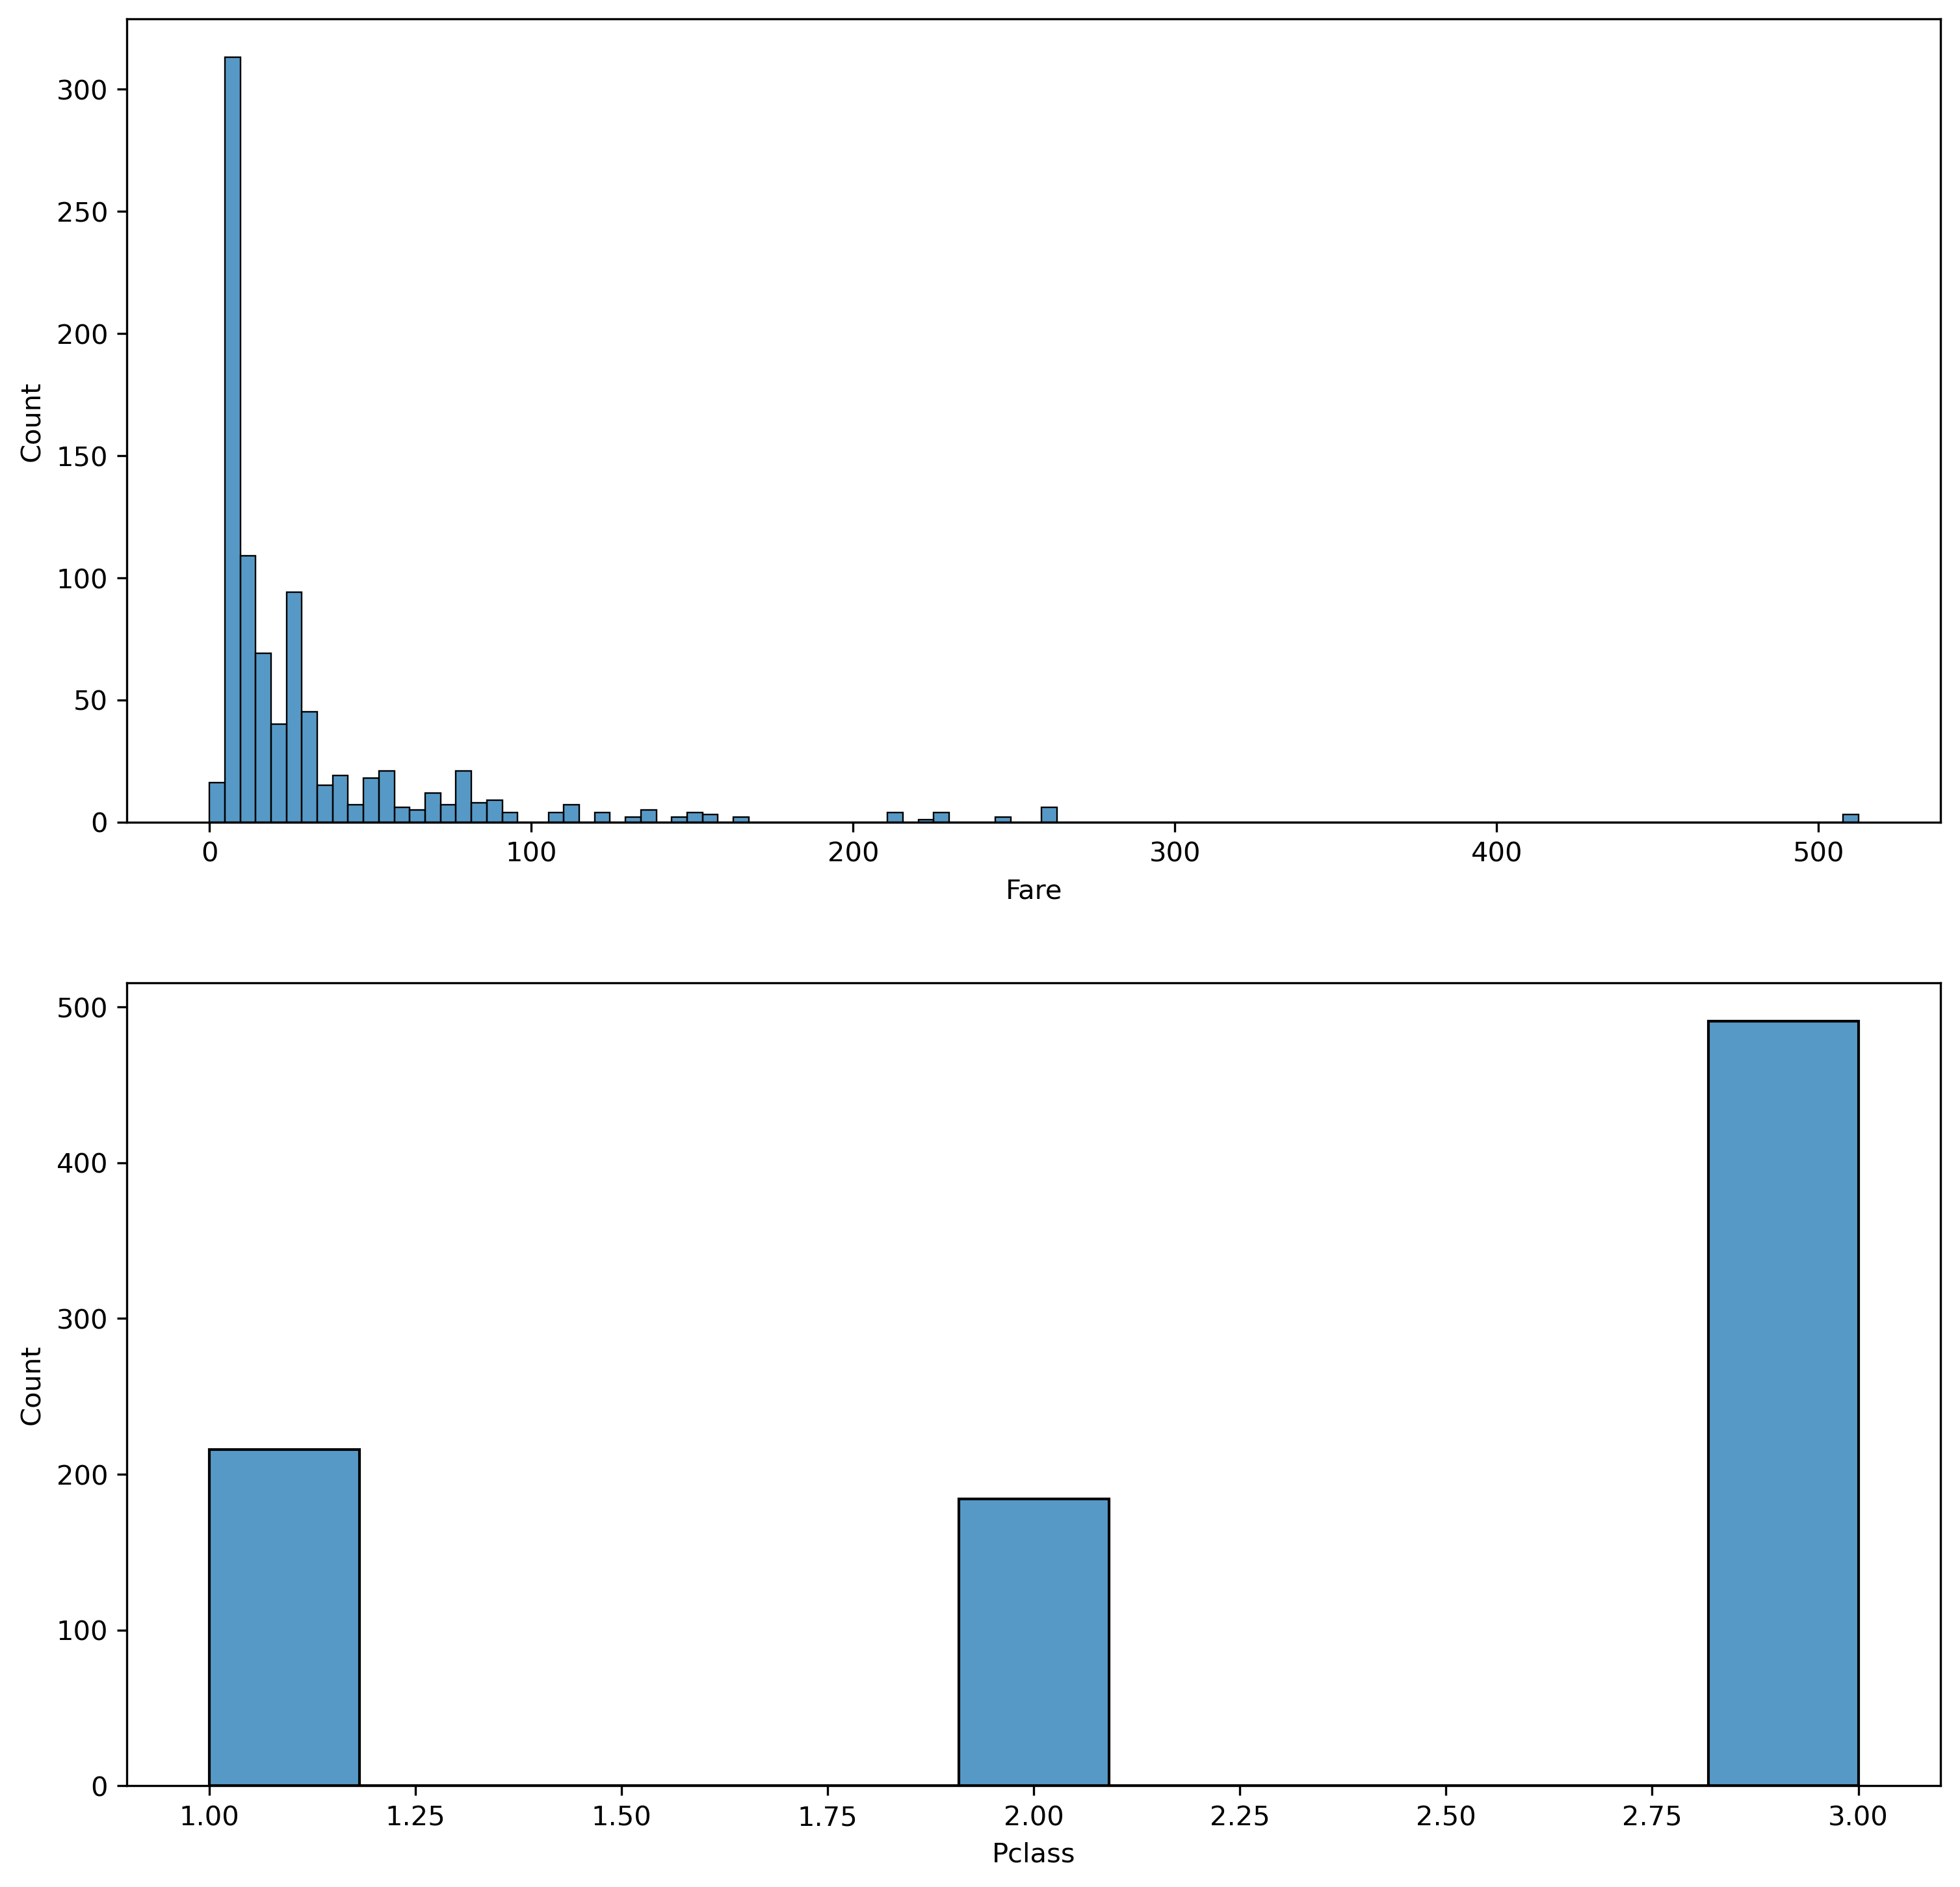

In [9]:
fig,axes = plt.subplots(nrows=2,ncols=1,figsize=[12,12],dpi=300)
sns.histplot(x='Fare',data=titanic,ax=axes[0])
sns.histplot(x='Pclass',data=titanic,ax=axes[1])
plt.show()

before impute missing data need to know how much data points are missed

In [10]:
cup98 = pd.read_csv('../data/cup98LRN.txt',
                    usecols=['AGE', 'NUMCHLD', 'INCOME', 'WEALTH1', 'MBCRAFT',
                             'MBGARDEN', 'MBBOOKS', 'MBCOLECT', 'MAGFAML','MAGFEM', 'MAGMALE'])
cup98.head(5)

,AGE,NUMCHLD,INCOME,WEALTH1,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE
0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,46.0,1.0,6.0,9.0,0.0,0.0,3.0,1.0,1.0,1.0,0.0
2,NaN,NaN,3.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,70.0,NaN,1.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,78.0,1.0,3.0,2.0,1.0,0.0,9.0,0.0,4.0,1.0,0.0


In [11]:
masked_data = cup98.isna()
missing_count = masked_data.sum()
missing_present = masked_data.mean()

missing_count, missing_present

(AGE         23665
 NUMCHLD     83026
 INCOME      21286
 WEALTH1     44732
 MBCRAFT     52854
 MBGARDEN    52854
 MBBOOKS     52854
 MBCOLECT    52914
 MAGFAML     52854
 MAGFEM      52854
 MAGMALE     52854
 dtype: int64,
 AGE         0.248030
 NUMCHLD     0.870184
 INCOME      0.223096
 WEALTH1     0.468830
 MBCRAFT     0.553955
 MBGARDEN    0.553955
 MBBOOKS     0.553955
 MBCOLECT    0.554584
 MAGFAML     0.553955
 MAGFEM      0.553955
 MAGMALE     0.553955
 dtype: float64)

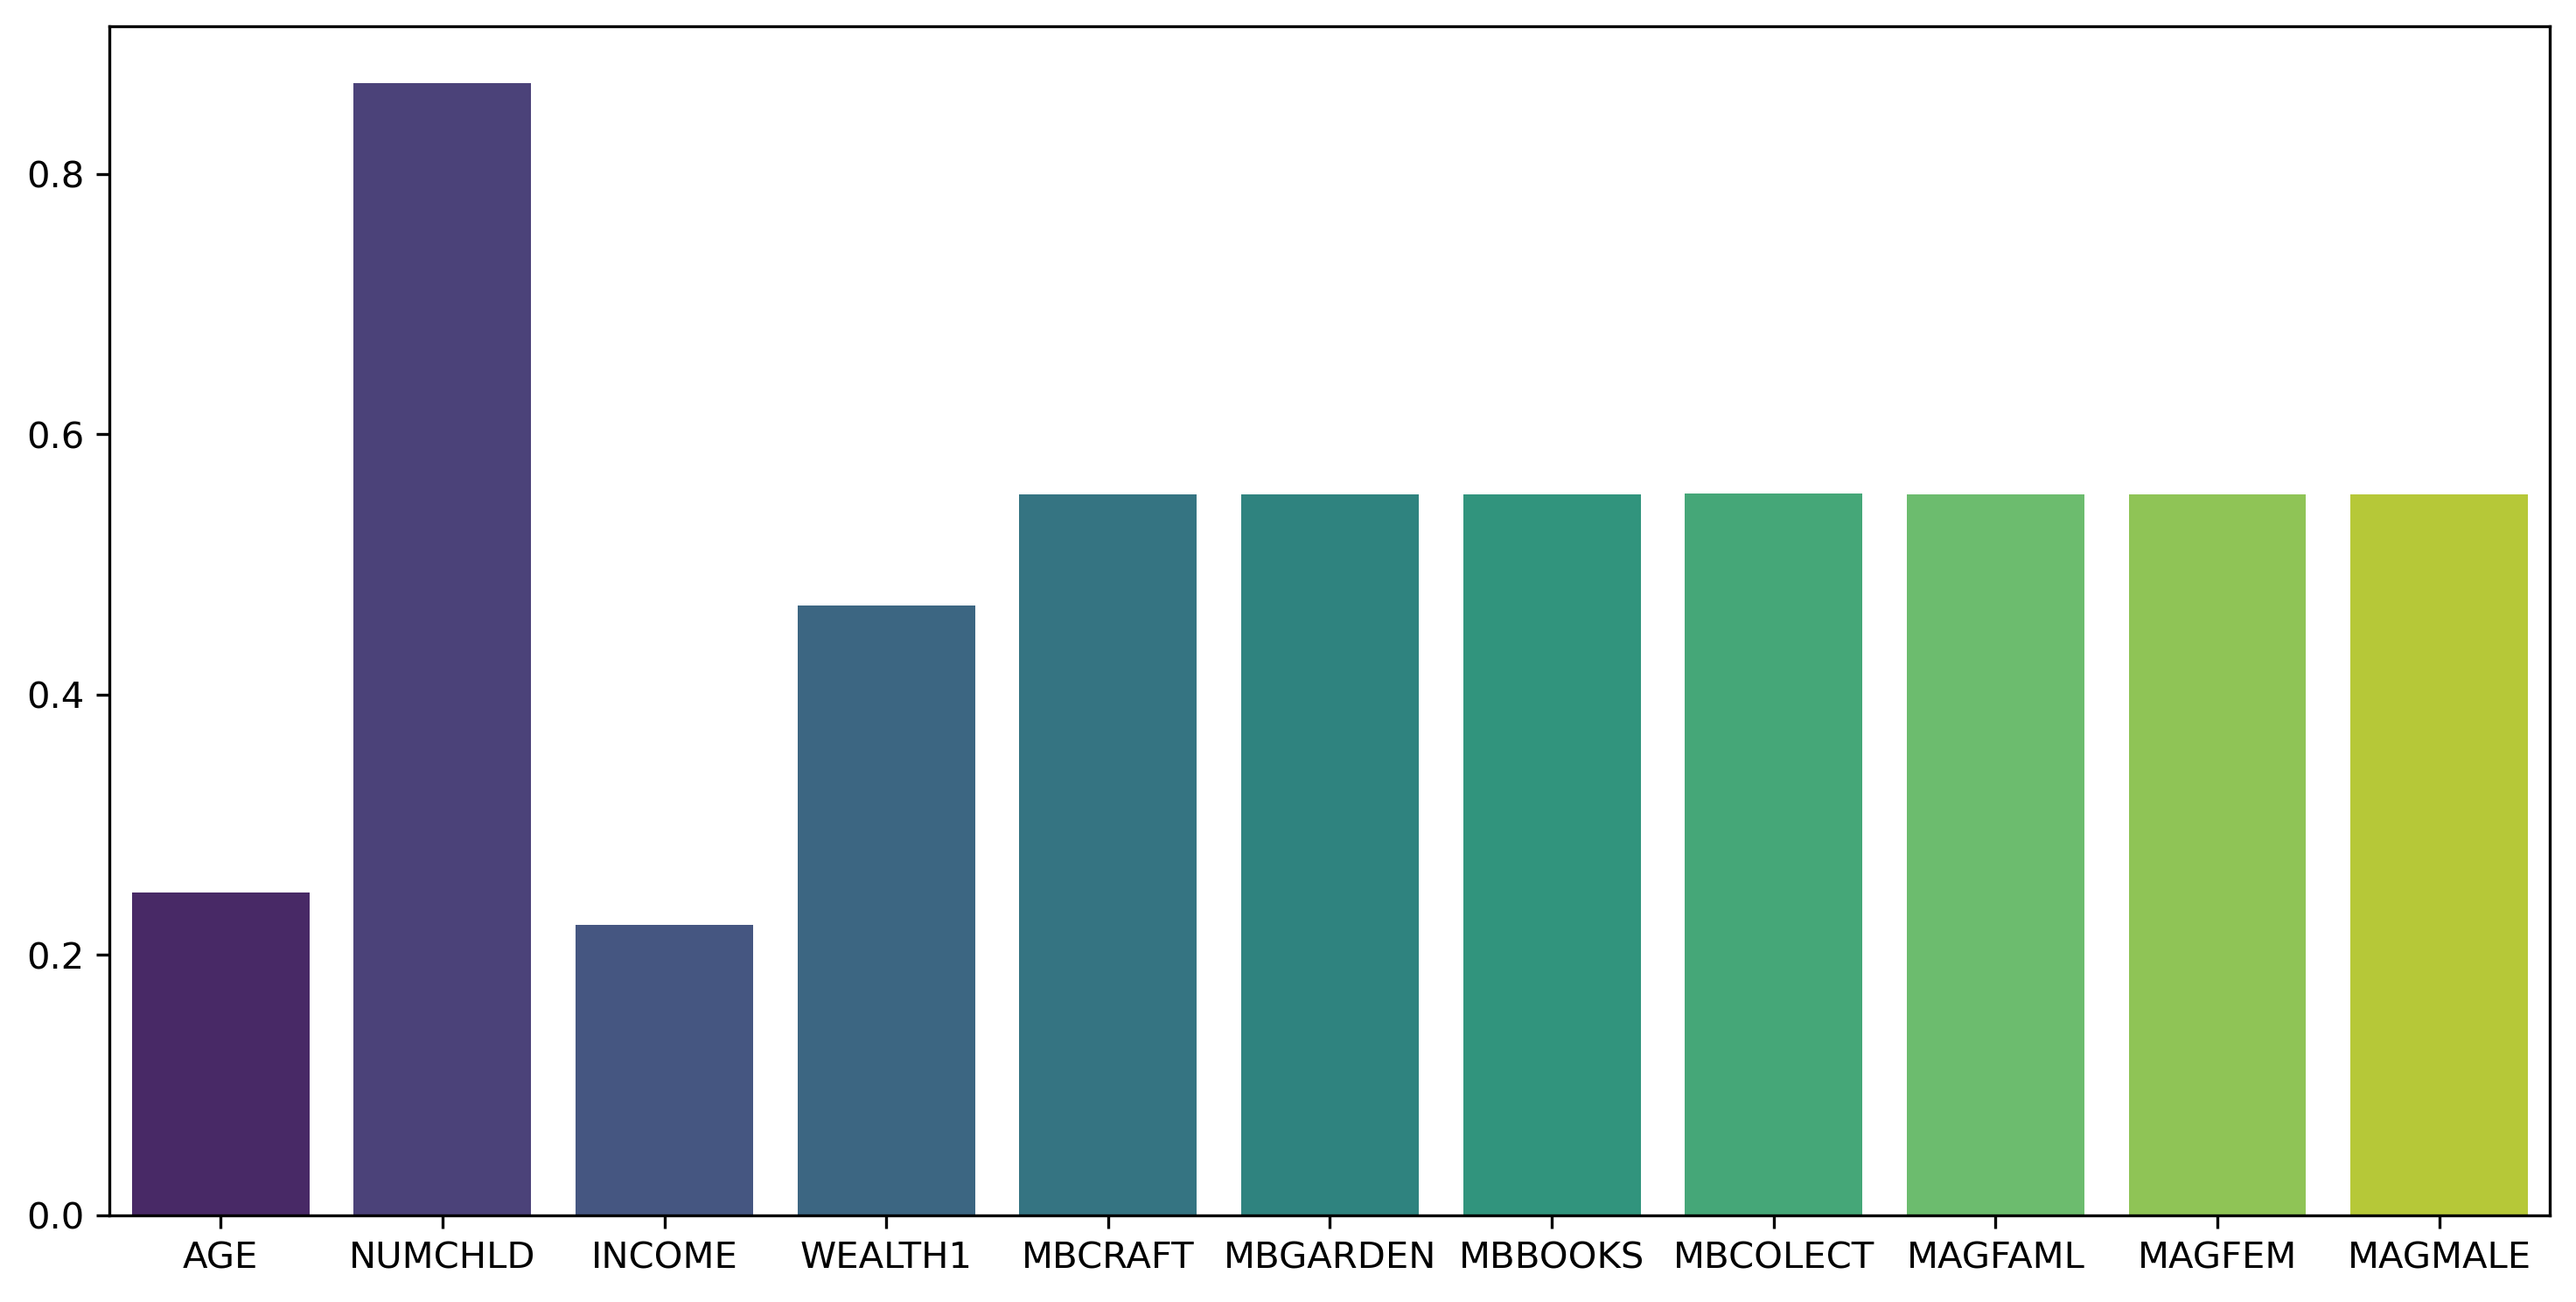

In [12]:
plt.figure(figsize=[12,6],dpi=300)
sns.barplot(x=missing_present.index,y=missing_present.values,palette='viridis')
plt.show()

cardinality in a categorical feature explain how many unique data in that<br>
feature. to acomplish this several in-built functions can use `unique`, `nunique`

In [13]:
cup98 = pd.read_csv('../data/cup98LRN.txt',
                    usecols=['GENDER', 'RFA_2', 'MDMAUD_A', 'RFA_2', 'DOMAIN', 'RFA_15'])

In [14]:
cup98.nunique()

DOMAIN      17
GENDER       7
RFA_2       14
RFA_15      34
MDMAUD_A     5
dtype: int64

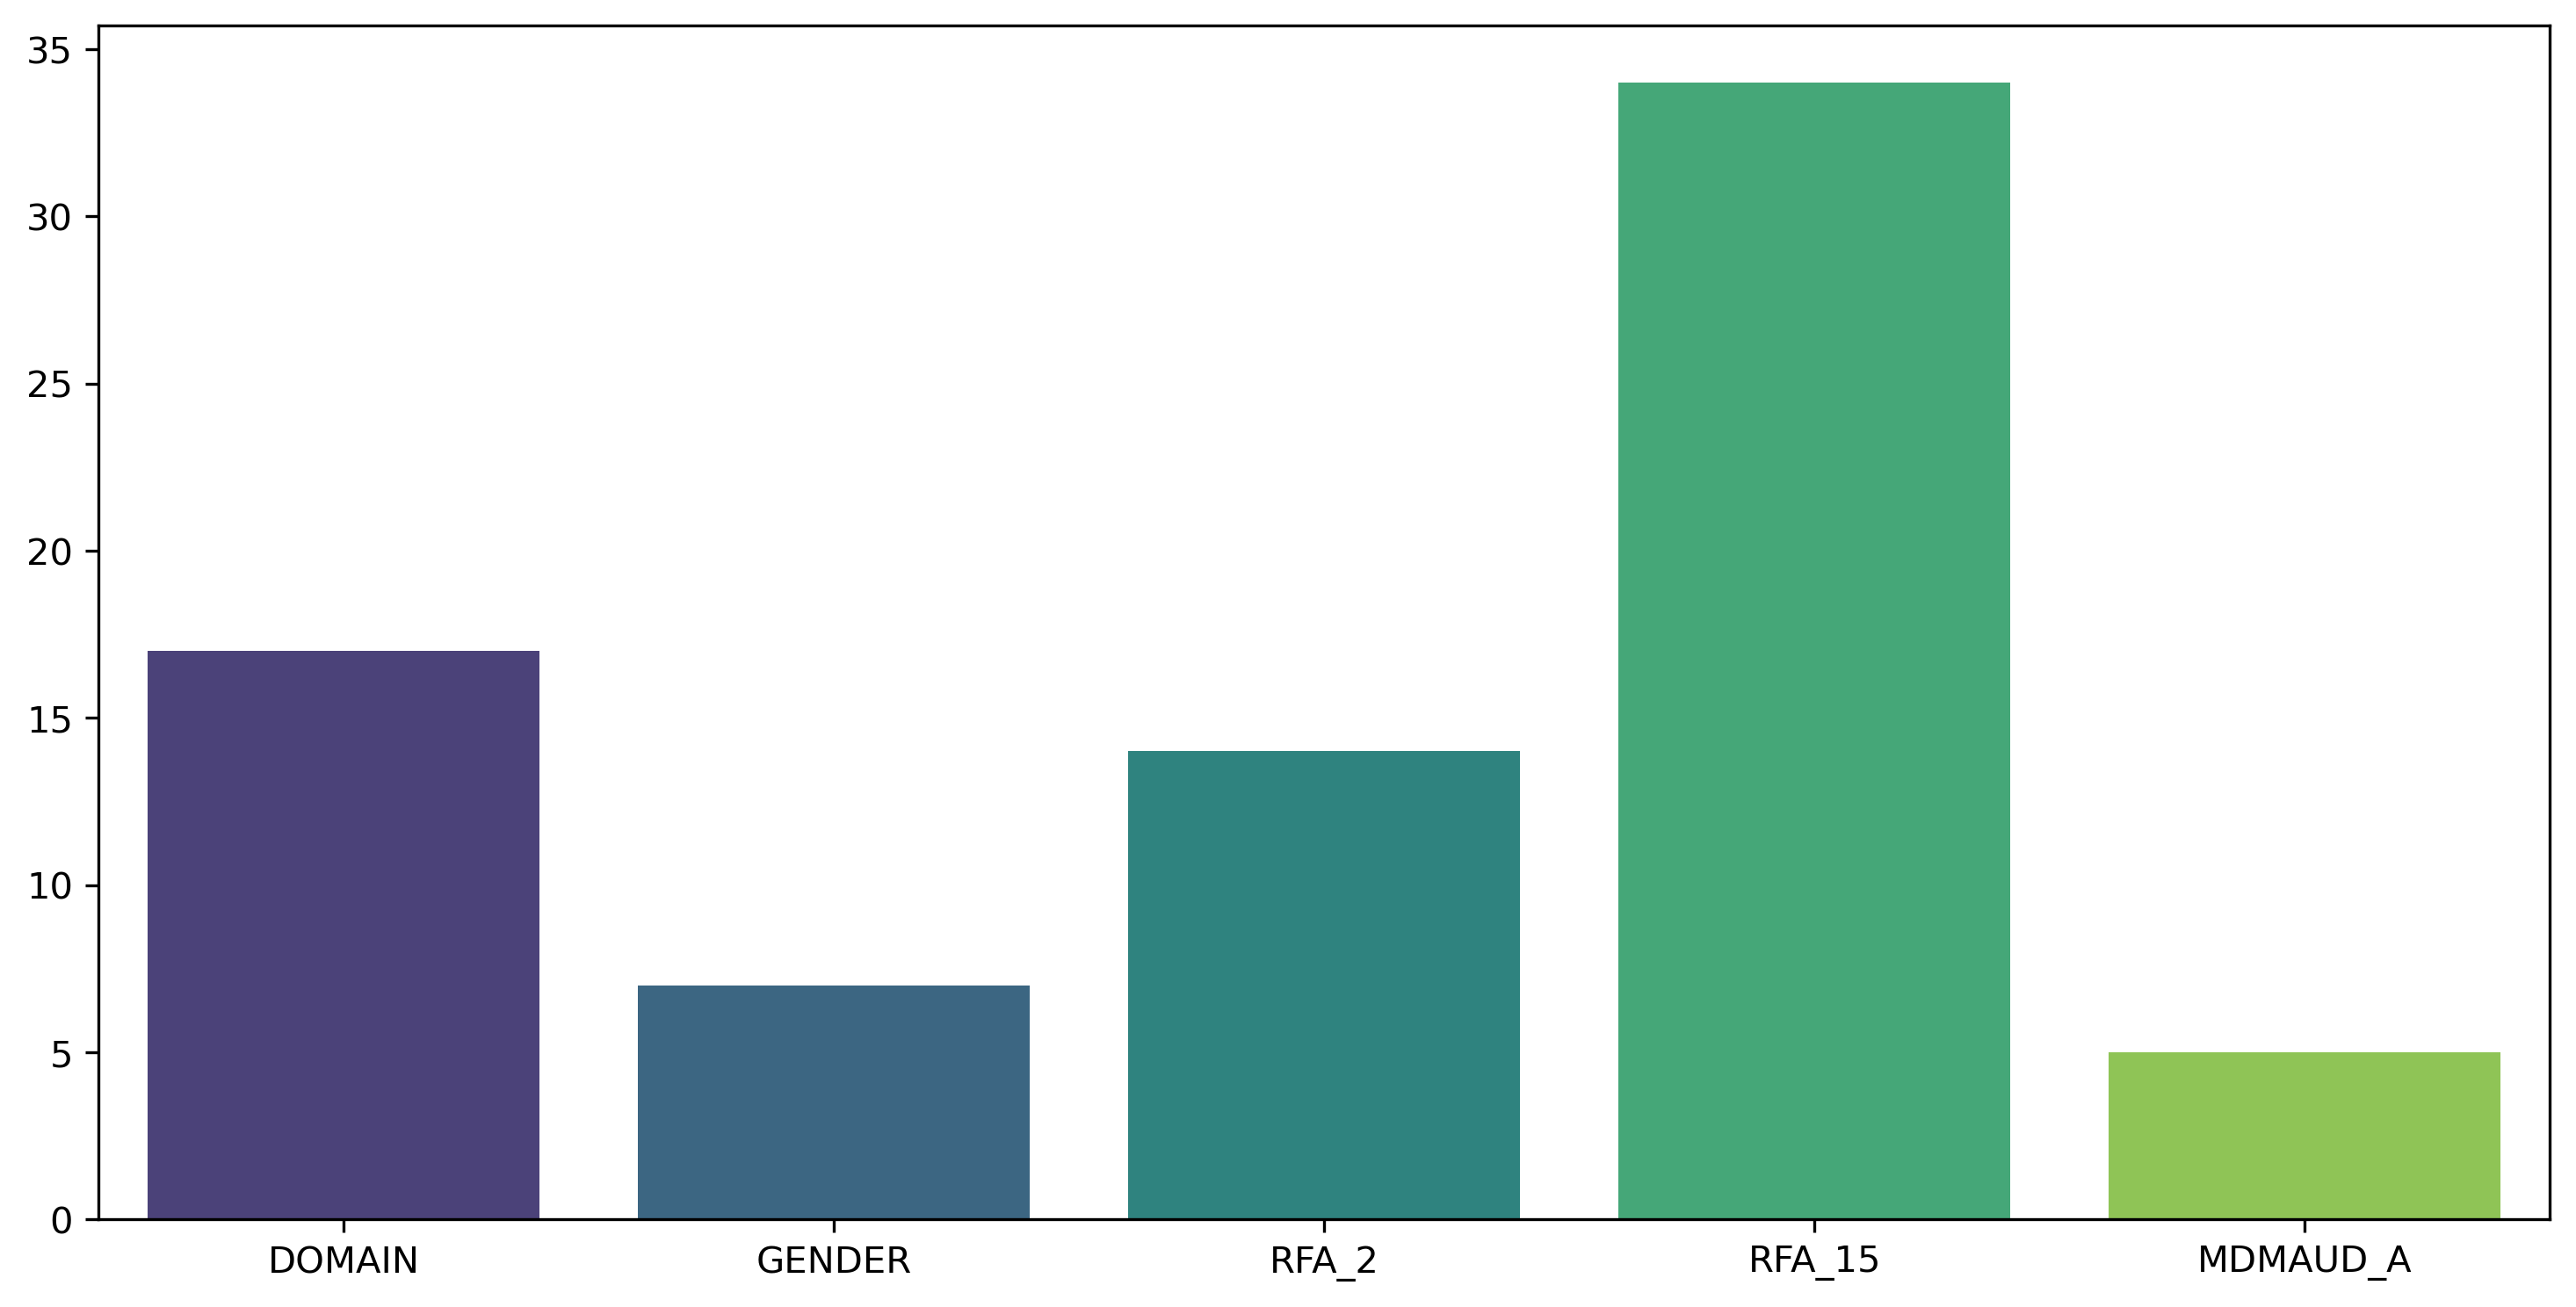

In [15]:
plt.figure(figsize=[12,6],dpi=300)
sns.barplot(x=cup98.nunique().index,y=cup98.nunique().values,palette='viridis')
plt.show()

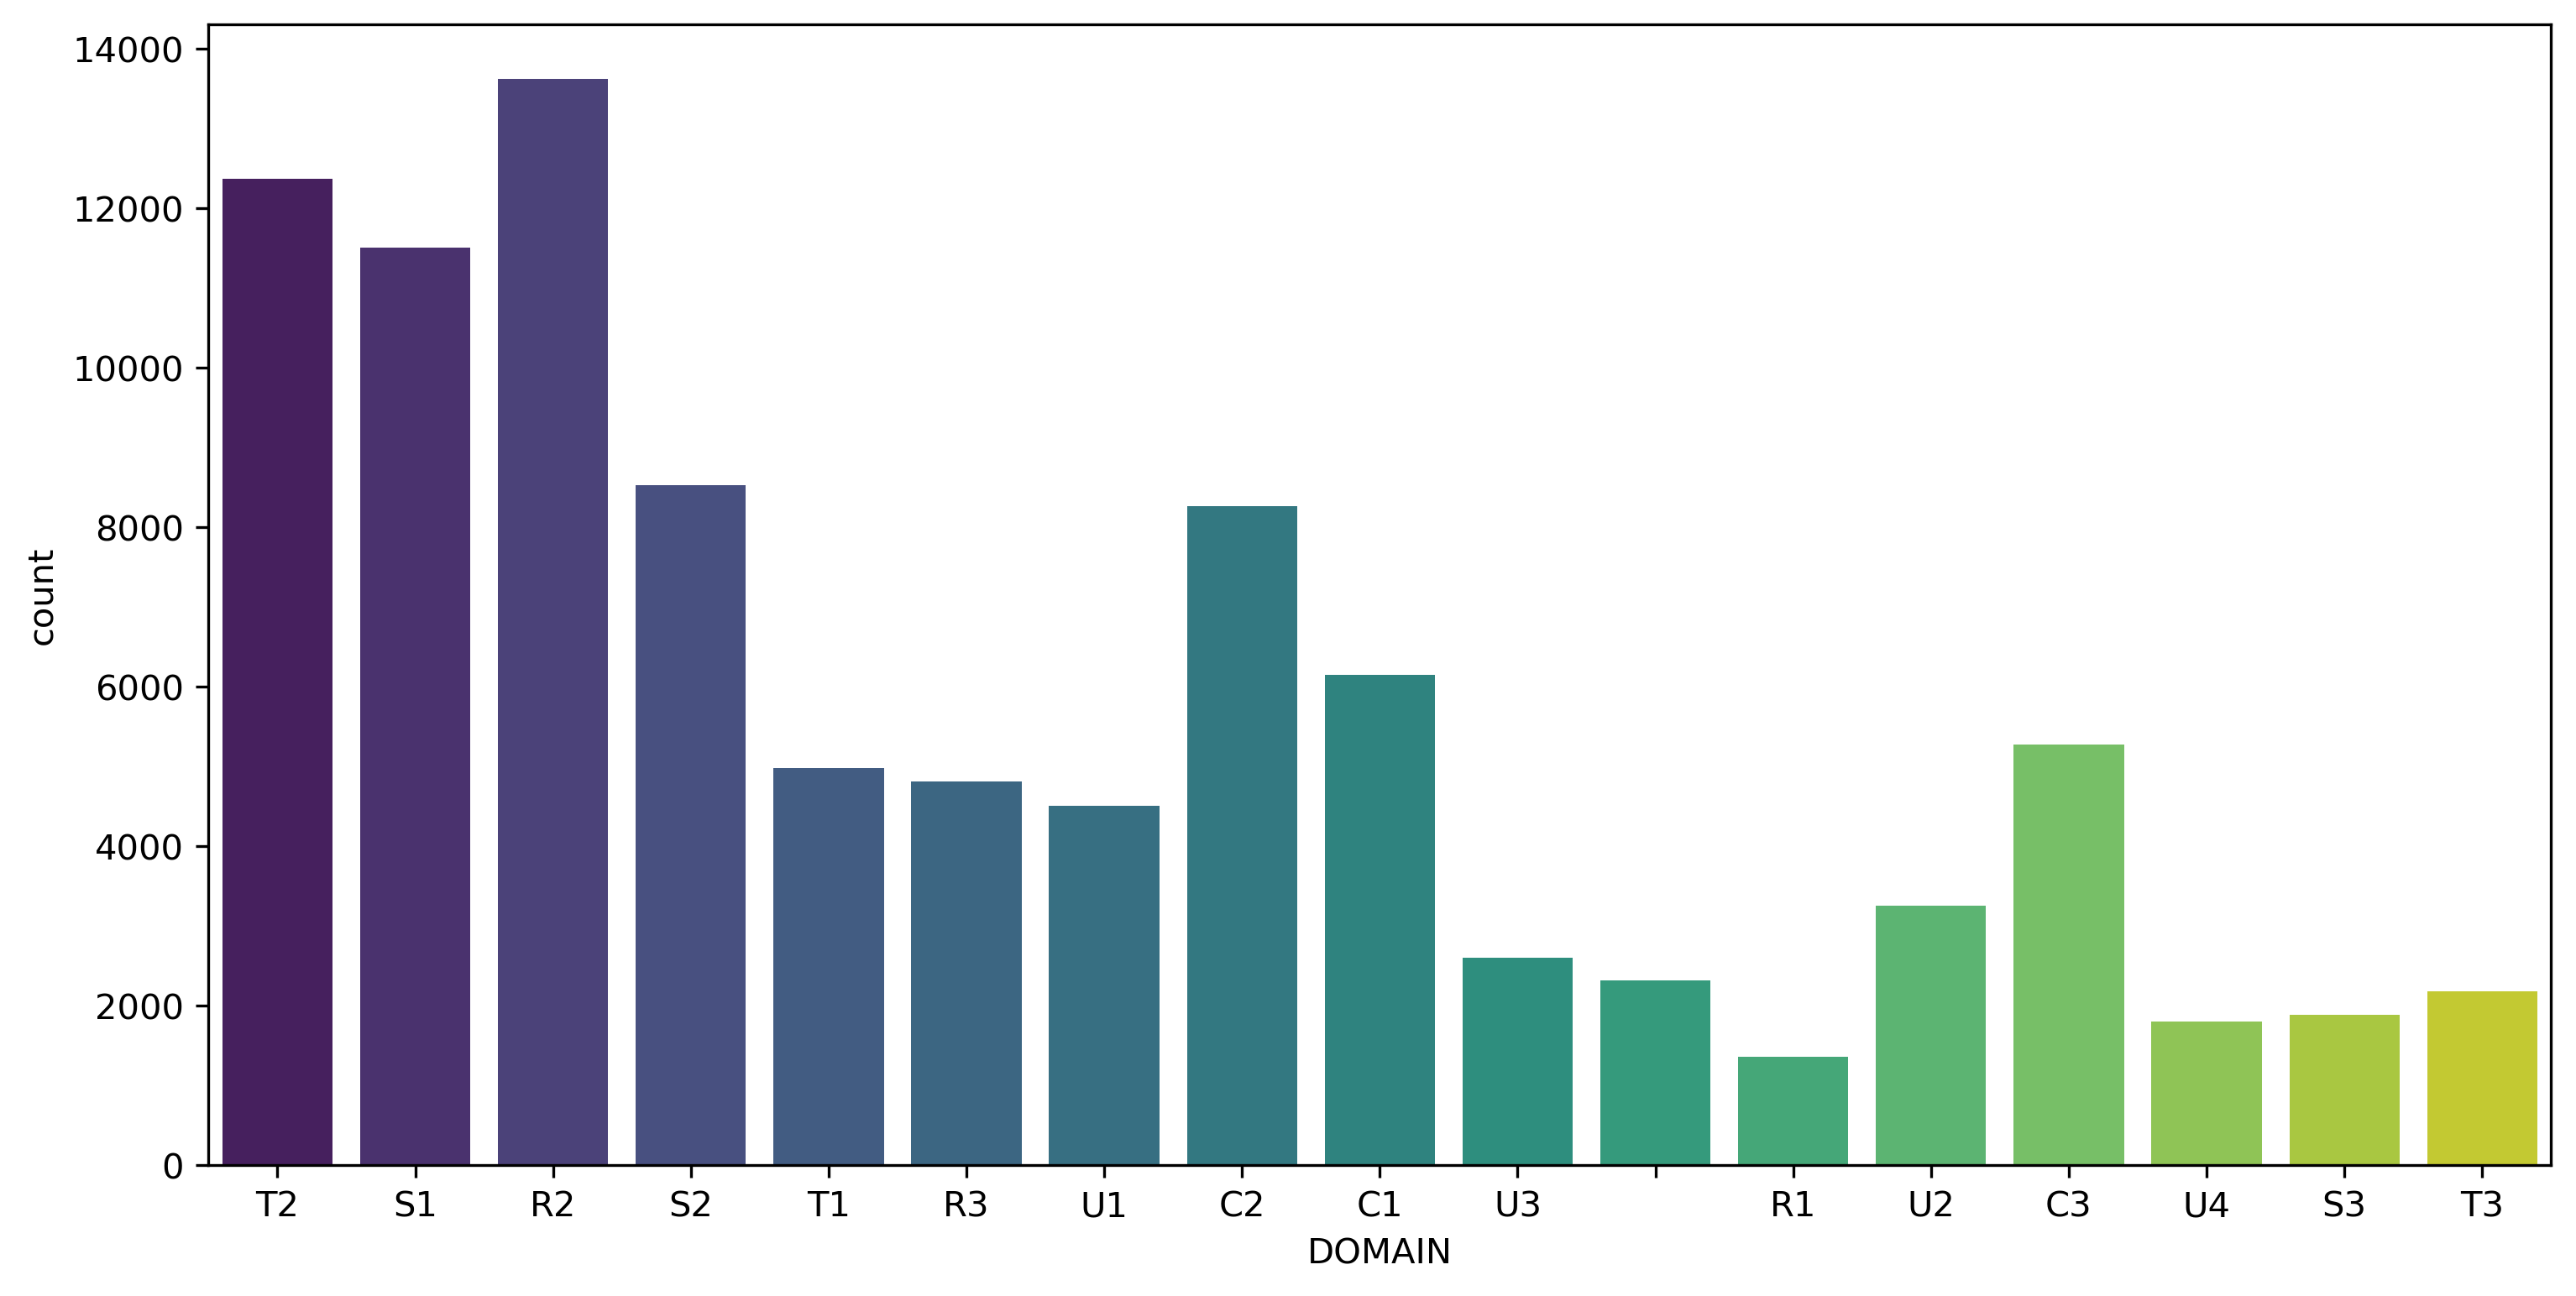

In [16]:
plt.figure(figsize=[12,6],dpi=300)
sns.countplot(x=cup98['DOMAIN'],palette='viridis')
plt.show()

class magnitude is important because some classes are more commune than some<br>
in feature

In [17]:
car = pd.read_csv('../data/car.data',header=None)
car.columns = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [18]:
car.nunique()

buying      4
maint       4
doors       4
persons     3
lug_boot    3
safety      3
class       4
dtype: int64

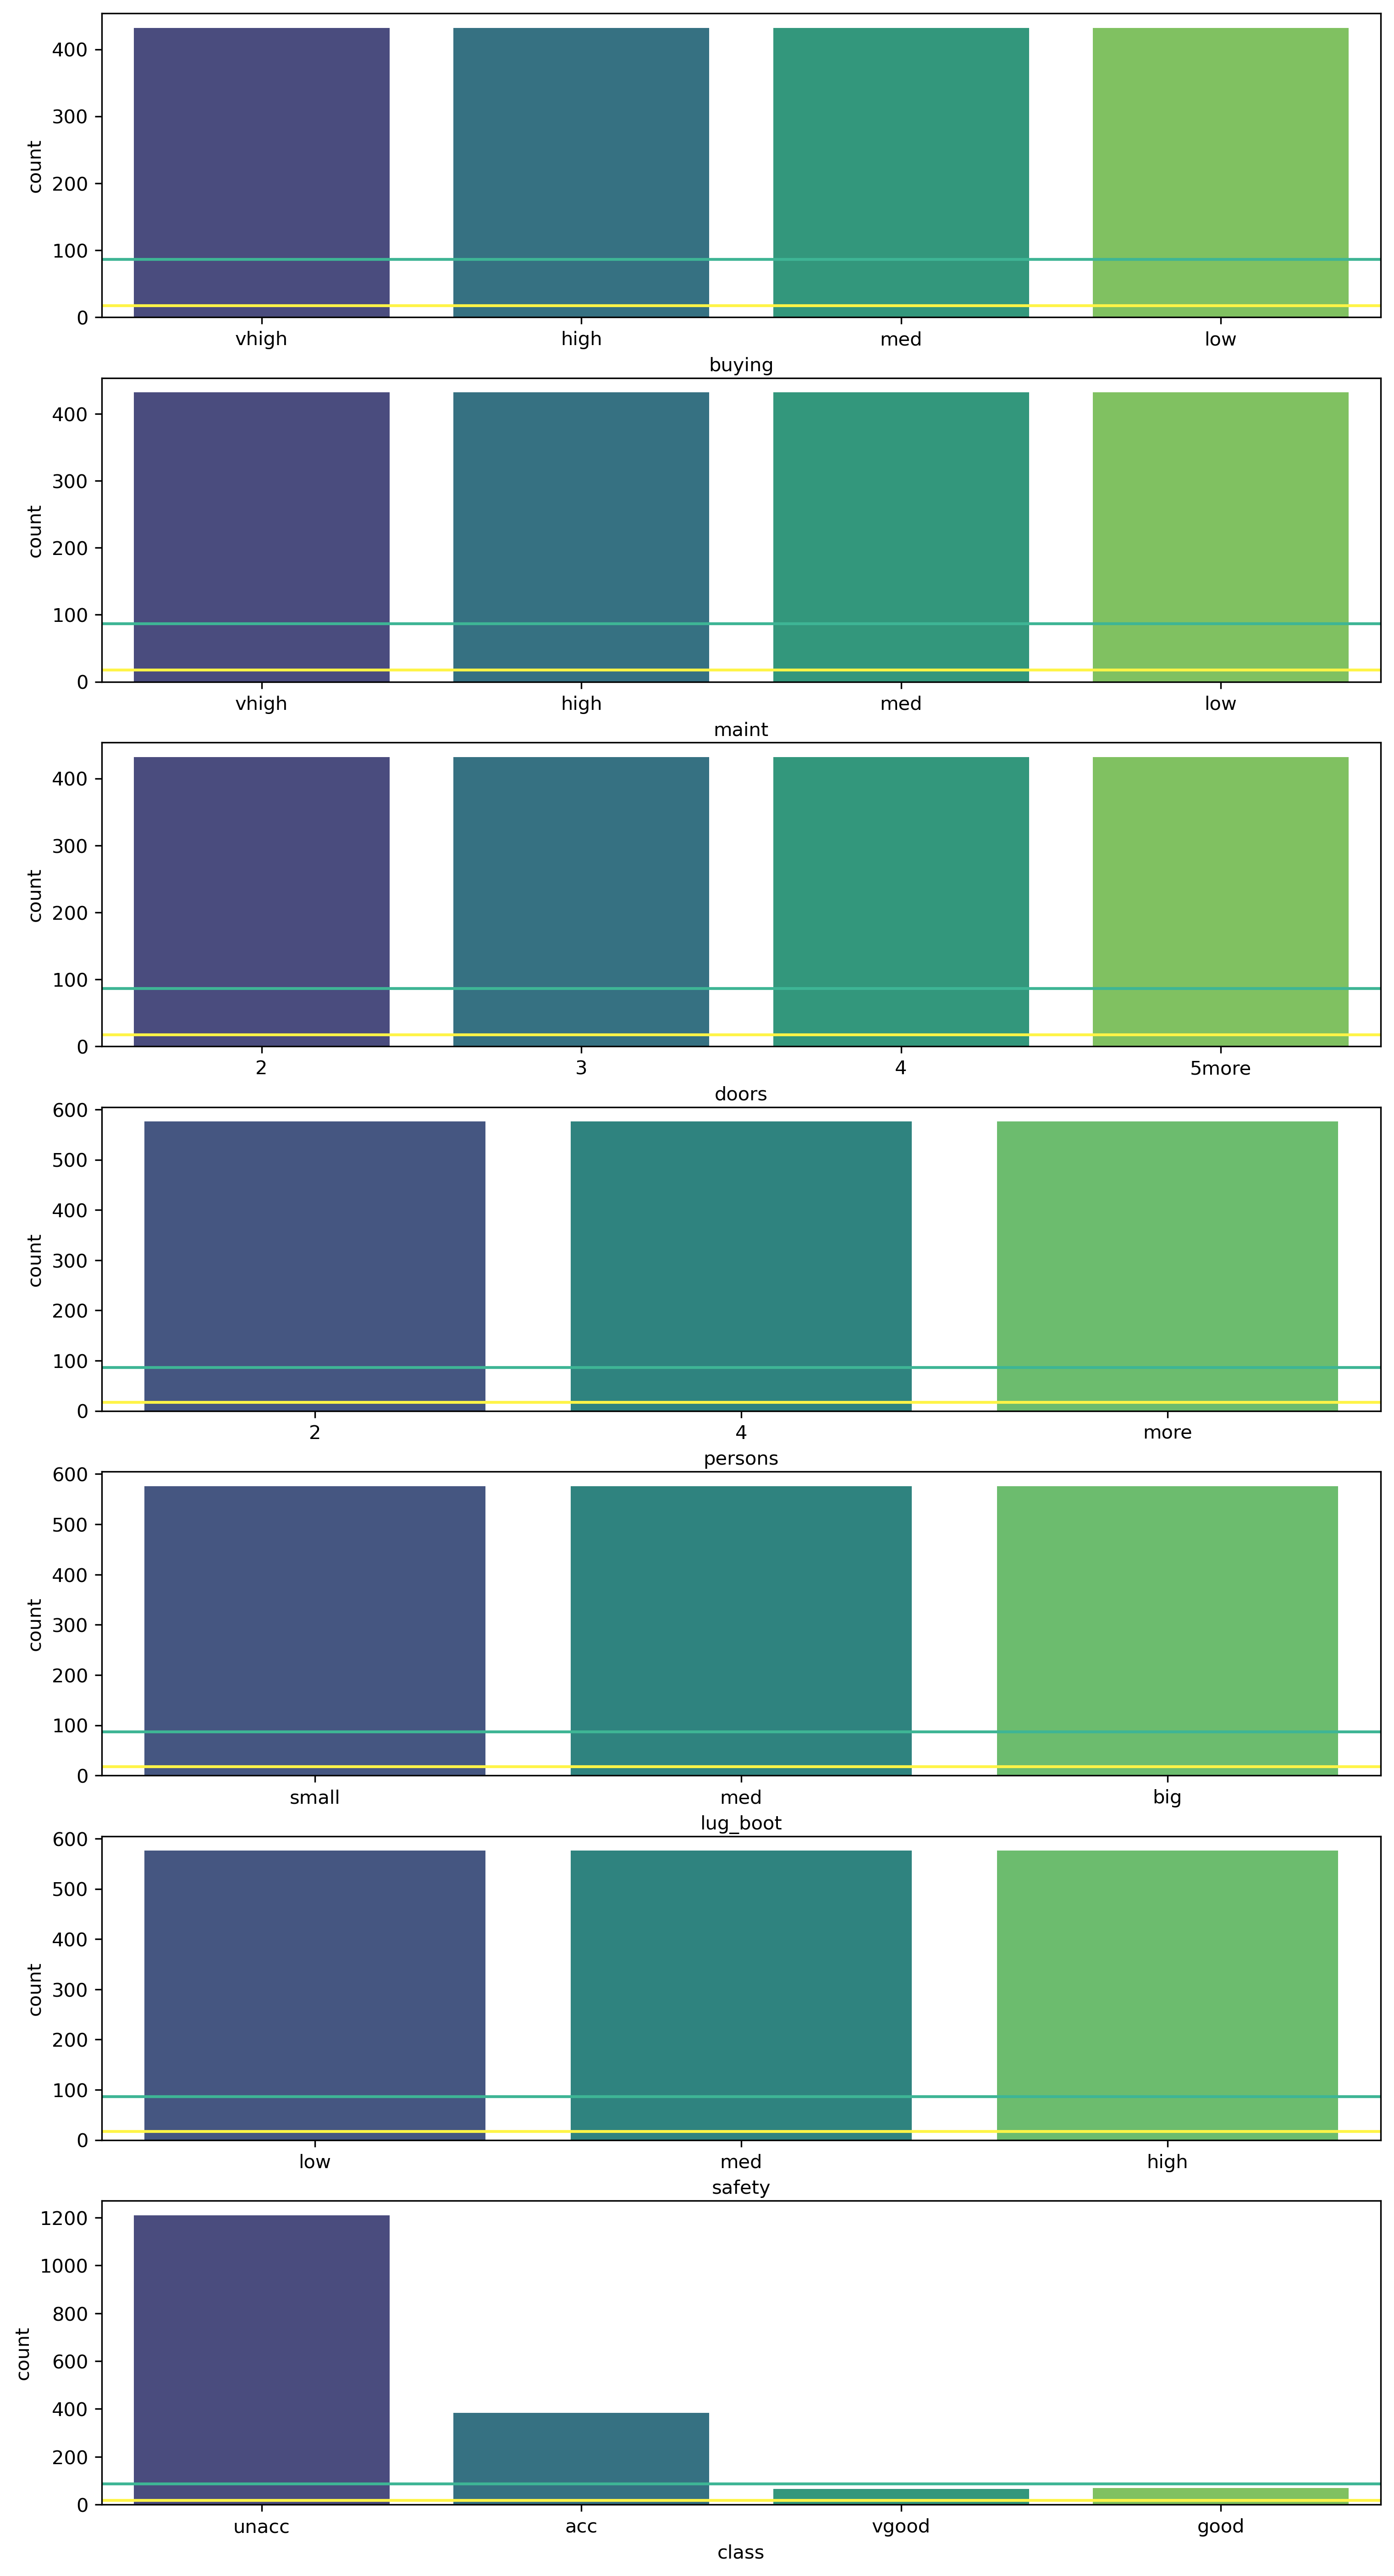

In [19]:
fig,axes = plt.subplots(nrows=7,ncols=1,figsize=[12,24],dpi=300)
axes = axes.ravel()

for i in range(len(axes)):
    sns.countplot(x=car[car.columns[i]],palette='viridis',ax=axes[i])
    axes[i].axhline(car.shape[0]*0.01,color='#FFF447')
    axes[i].axhline(car.shape[0]*0.05,color='#3EB595')

plt.show()

identify normal distribution using histograms and q-q plots. if data normally distributed<br>
the dots in q-q plot lie on 45 degree diagonal. `Age` feature very close to normal distribution.

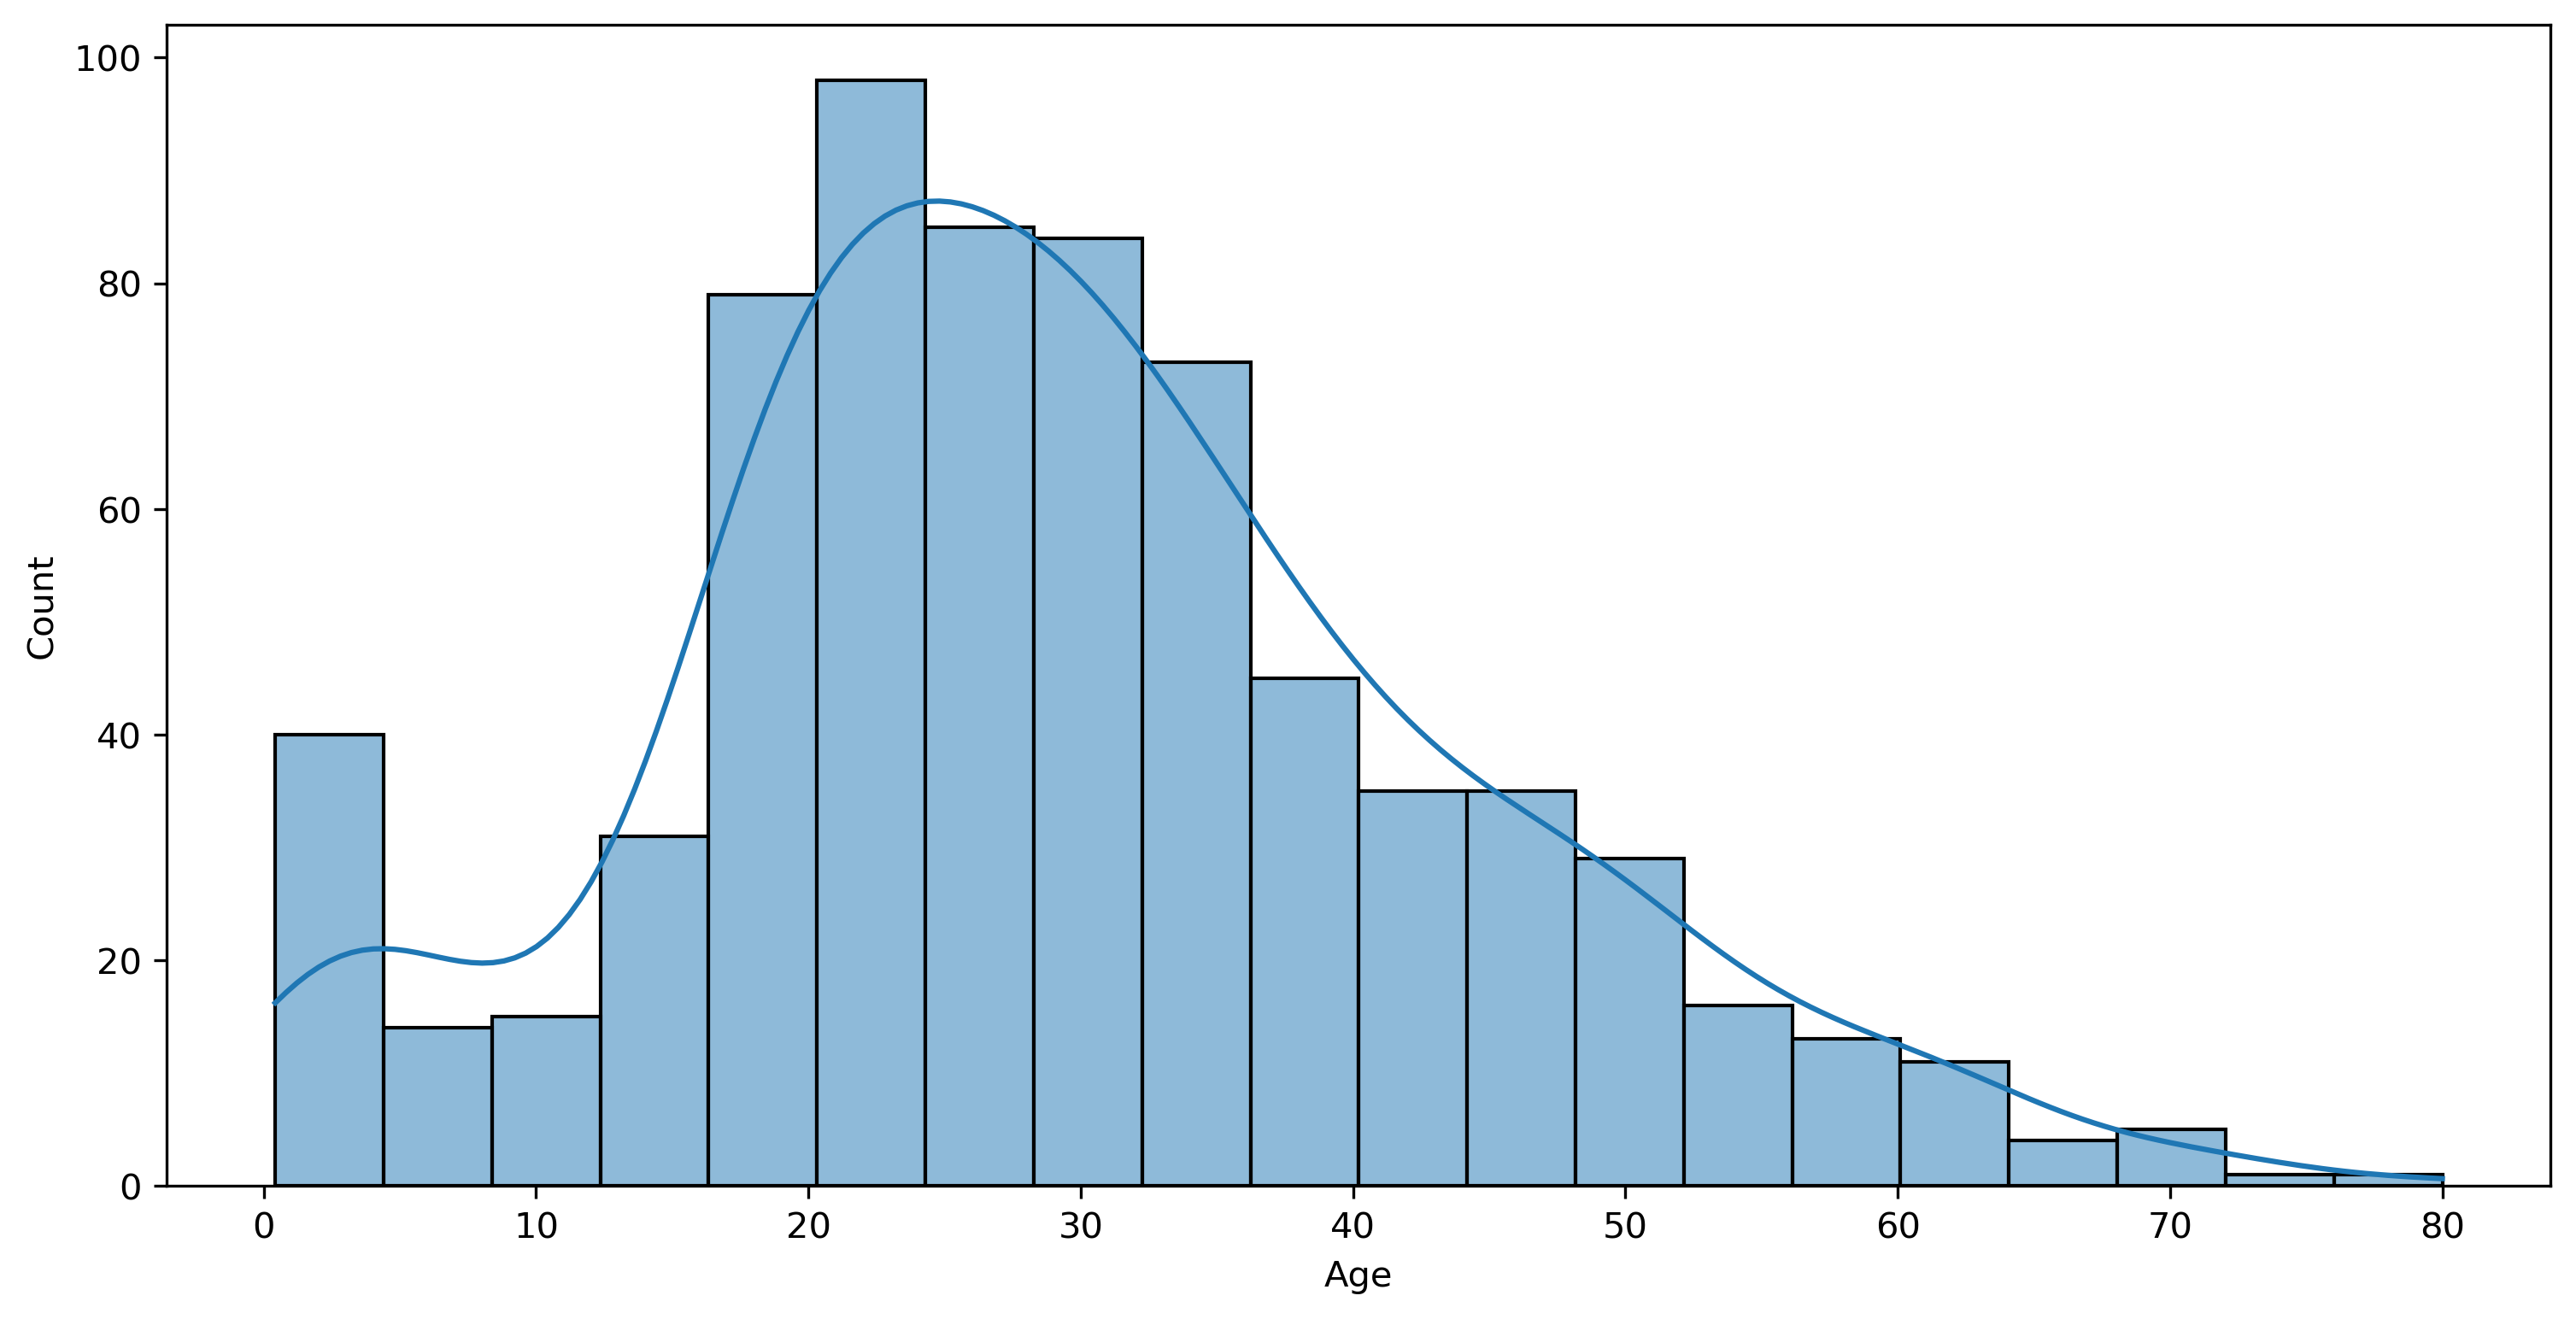

In [21]:
plt.figure(figsize=[12,6],dpi=300)
sns.histplot(x=titanic['Age'],bins='fd',palette='viridis',kde=True)
plt.show()

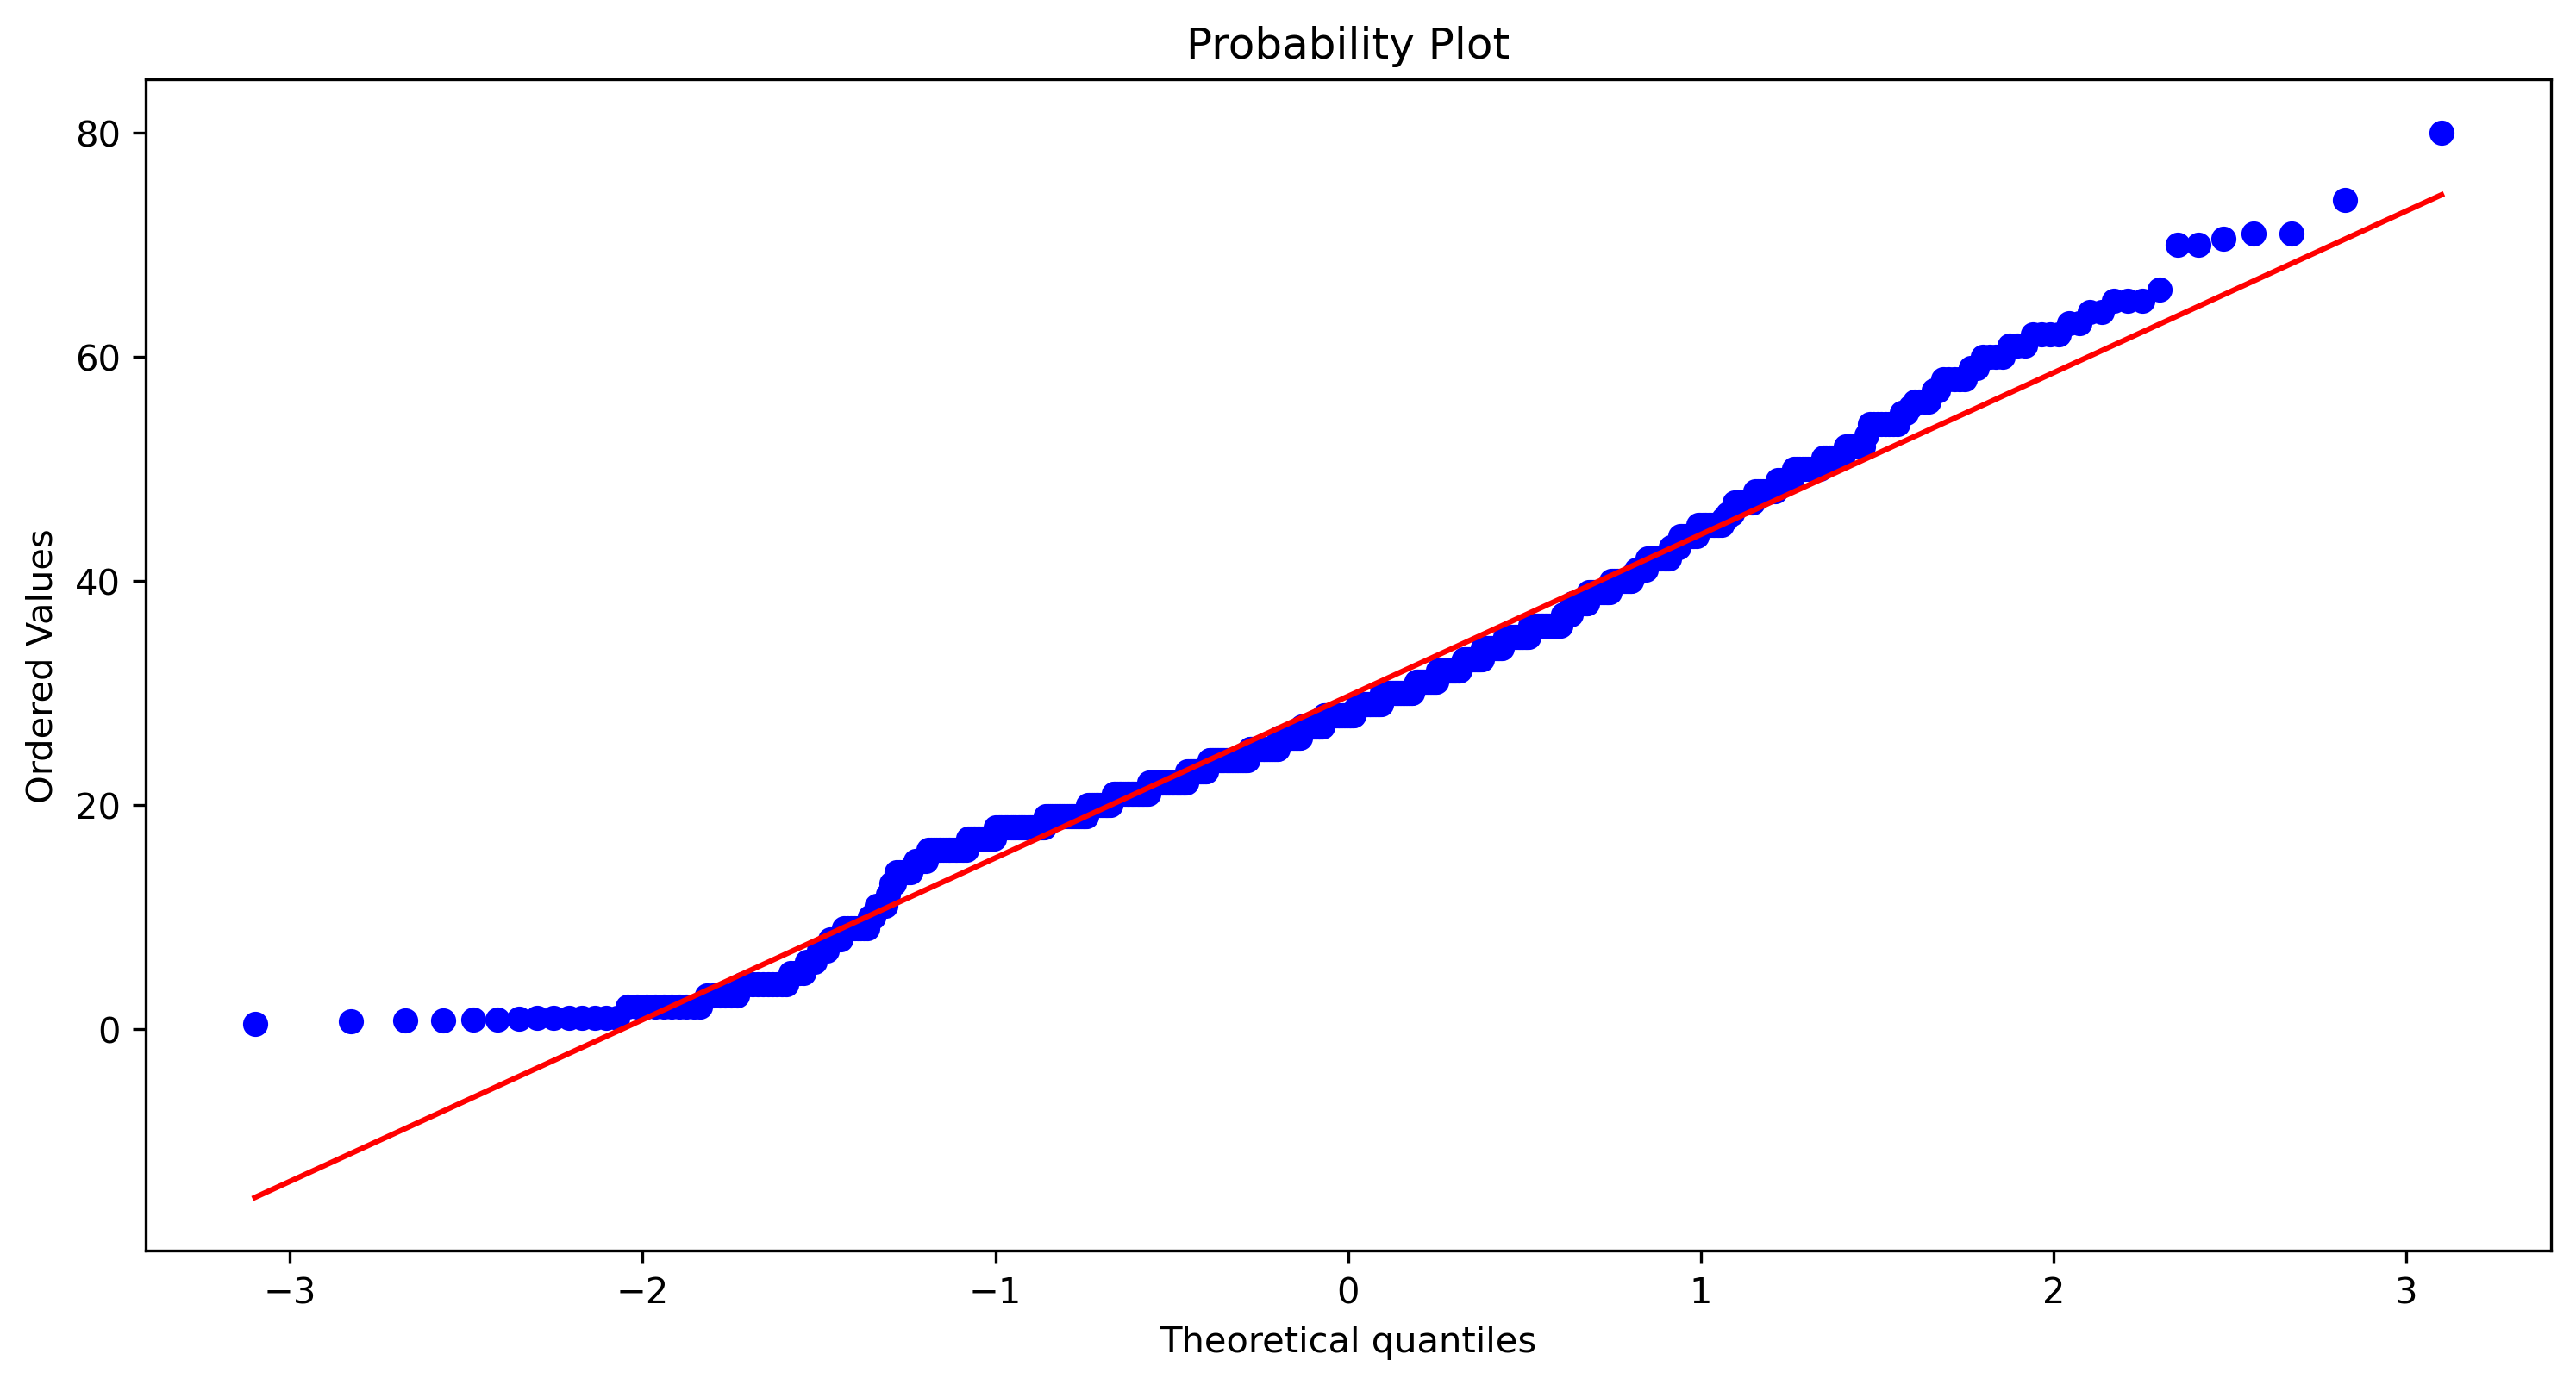

In [42]:
plt.figure(figsize=[12,6],dpi=300)
ss.probplot(titanic['Age'].dropna(),dist='norm',plot=plt,fit=True)
plt.show()

identify distribution of feature using histogram. `Survived` close to `uniform` distribution<br>
`Pclass` is `left-skewed`. `SibSp, Parch` both right skewed and `Age` close to `normal-distribution`<br>
and `Fare` is `F-distribution`.

In [43]:
num_feature = titanic.select_dtypes(include=np.number)
num_feature.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

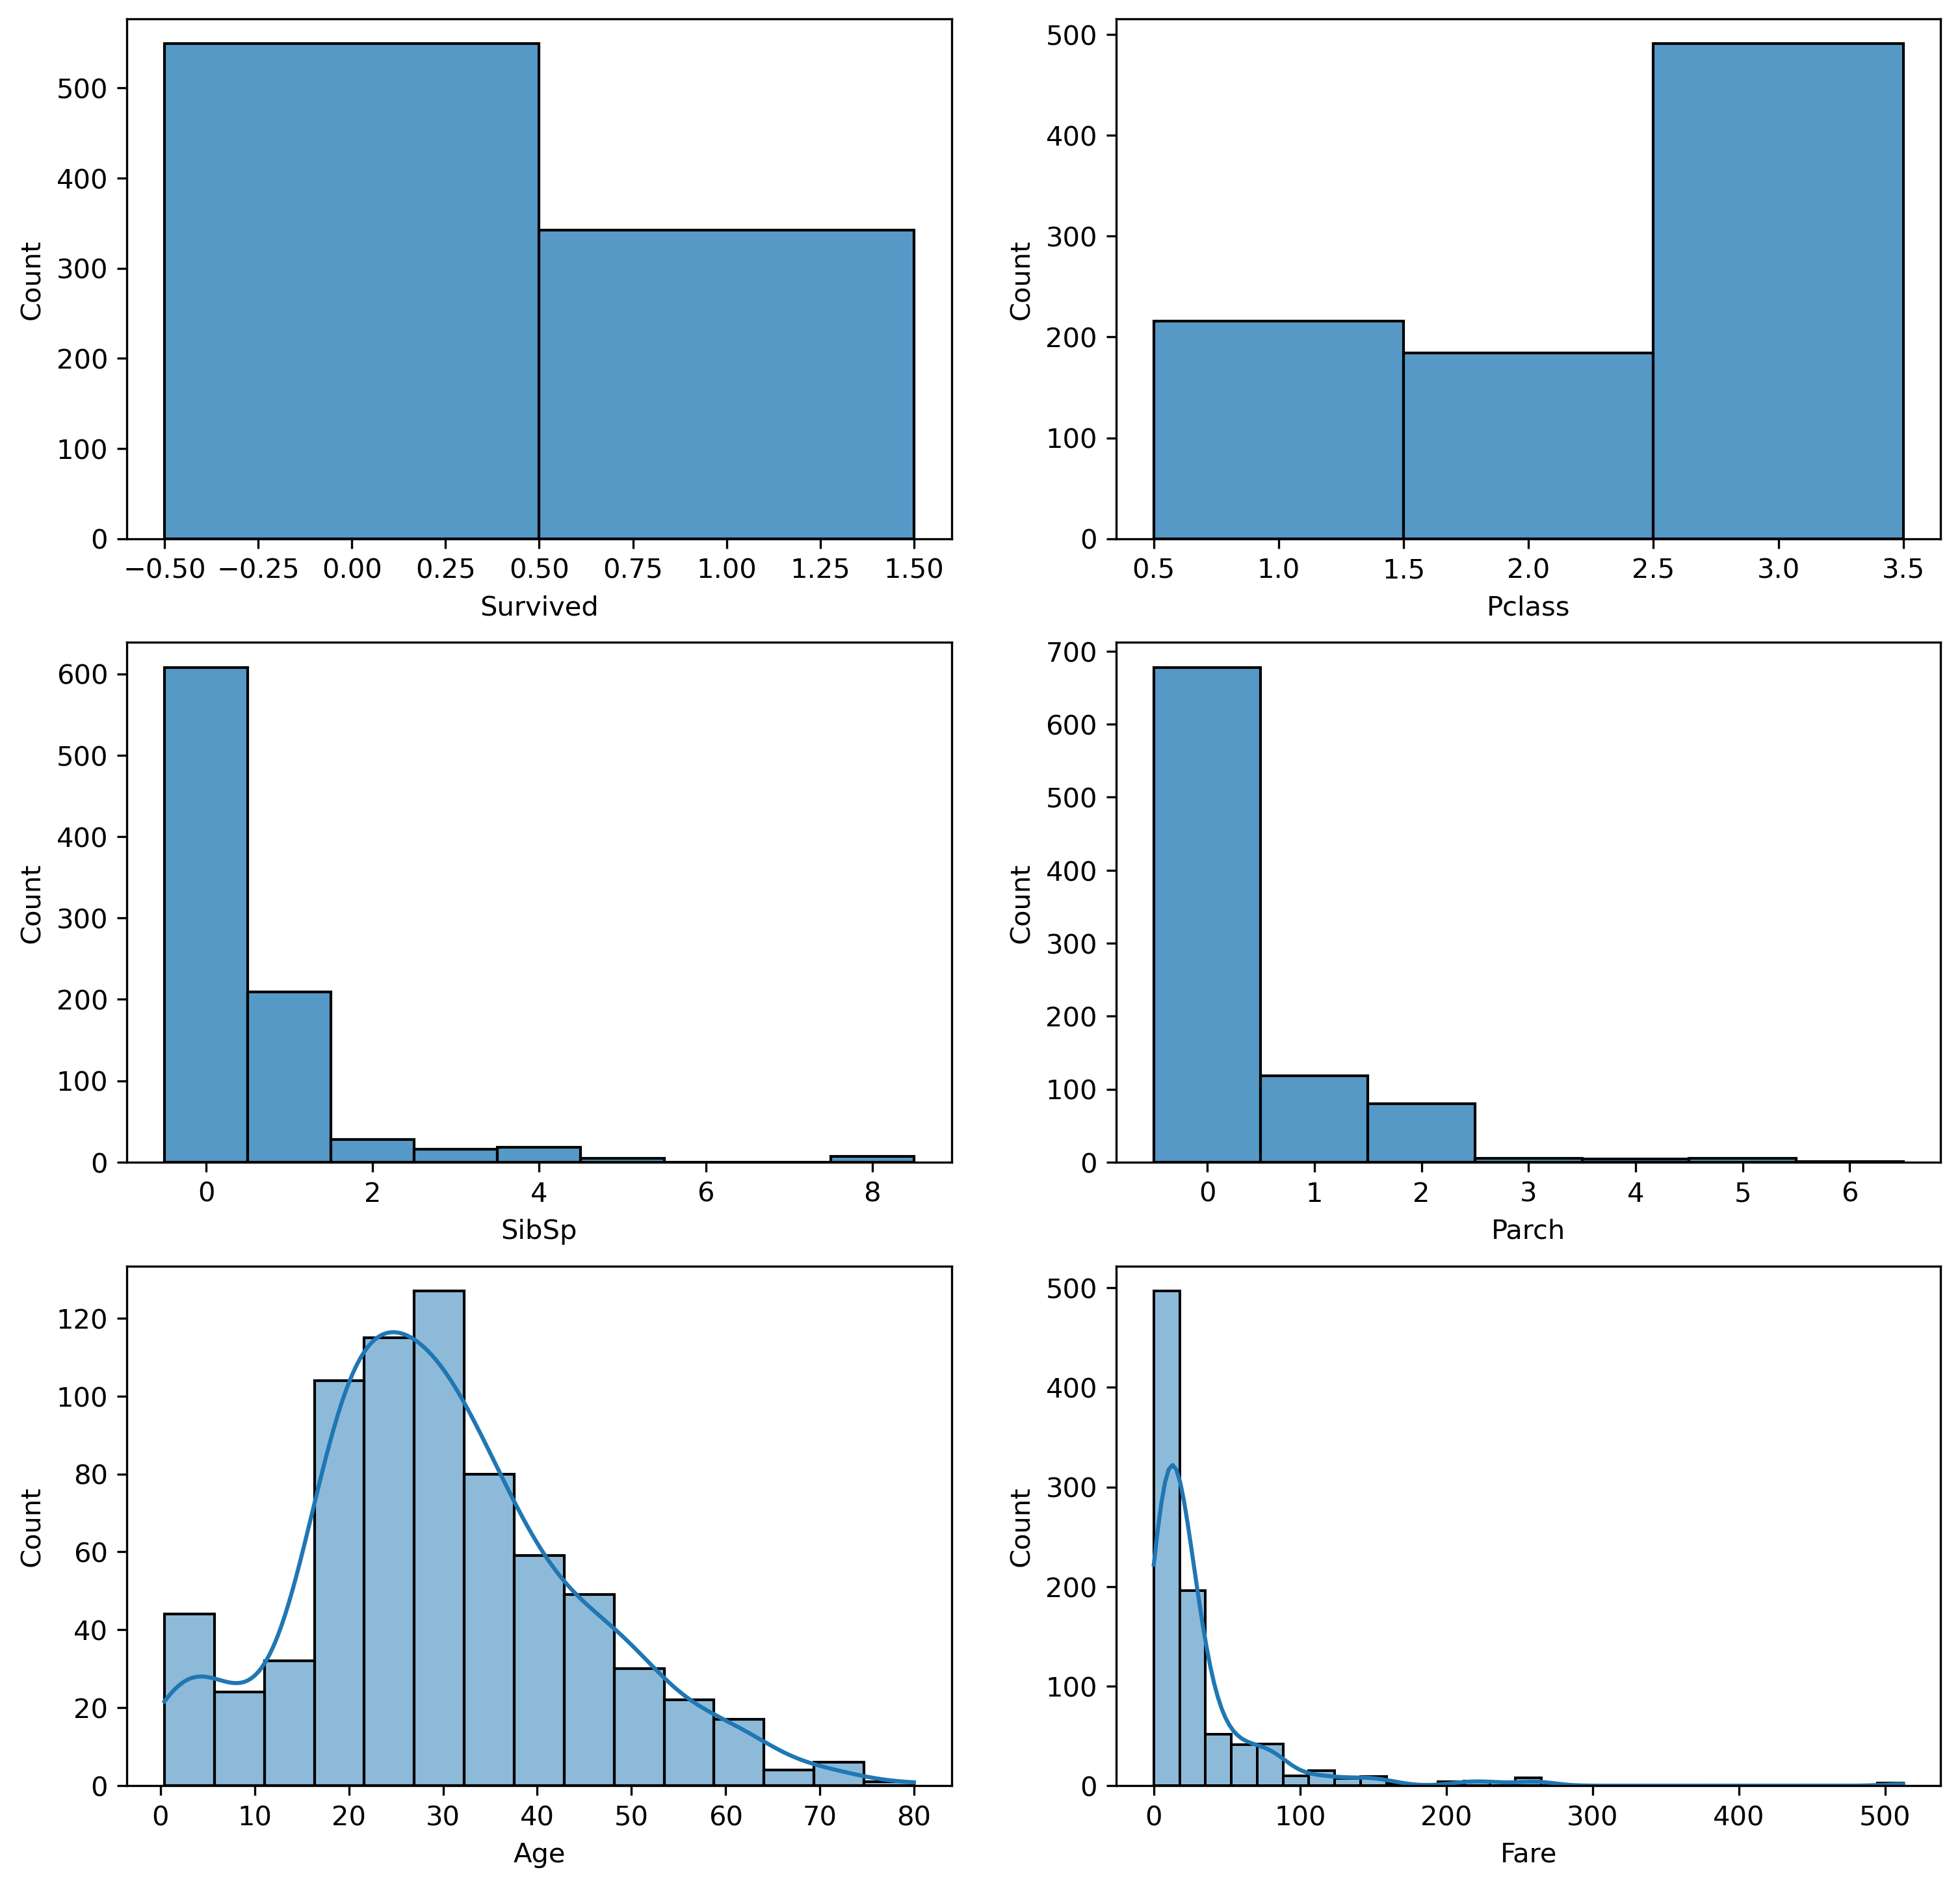

In [68]:
cols = ['Survived','Pclass','SibSp','Parch','Age','Fare']
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=[12,12],dpi=300)
axes = axes.ravel()

for i in range(4):
    sns.histplot(x=titanic[cols[i]],discrete=True,ax=axes[i])

for i in range(4,6,1):
    sns.histplot(titanic[cols[i]],bins='scott',ax=axes[i],kde=True)

plt.show()

identify outliers with IQR and box plots.

In [70]:
for i in range(len(cols)):
    print(f'{cols[i]} : {ss.iqr(titanic[cols[i]].dropna())}')

Survived : 1.0
Pclass : 1.0
SibSp : 1.0
Parch : 0.0
Age : 17.875
Fare : 23.0896


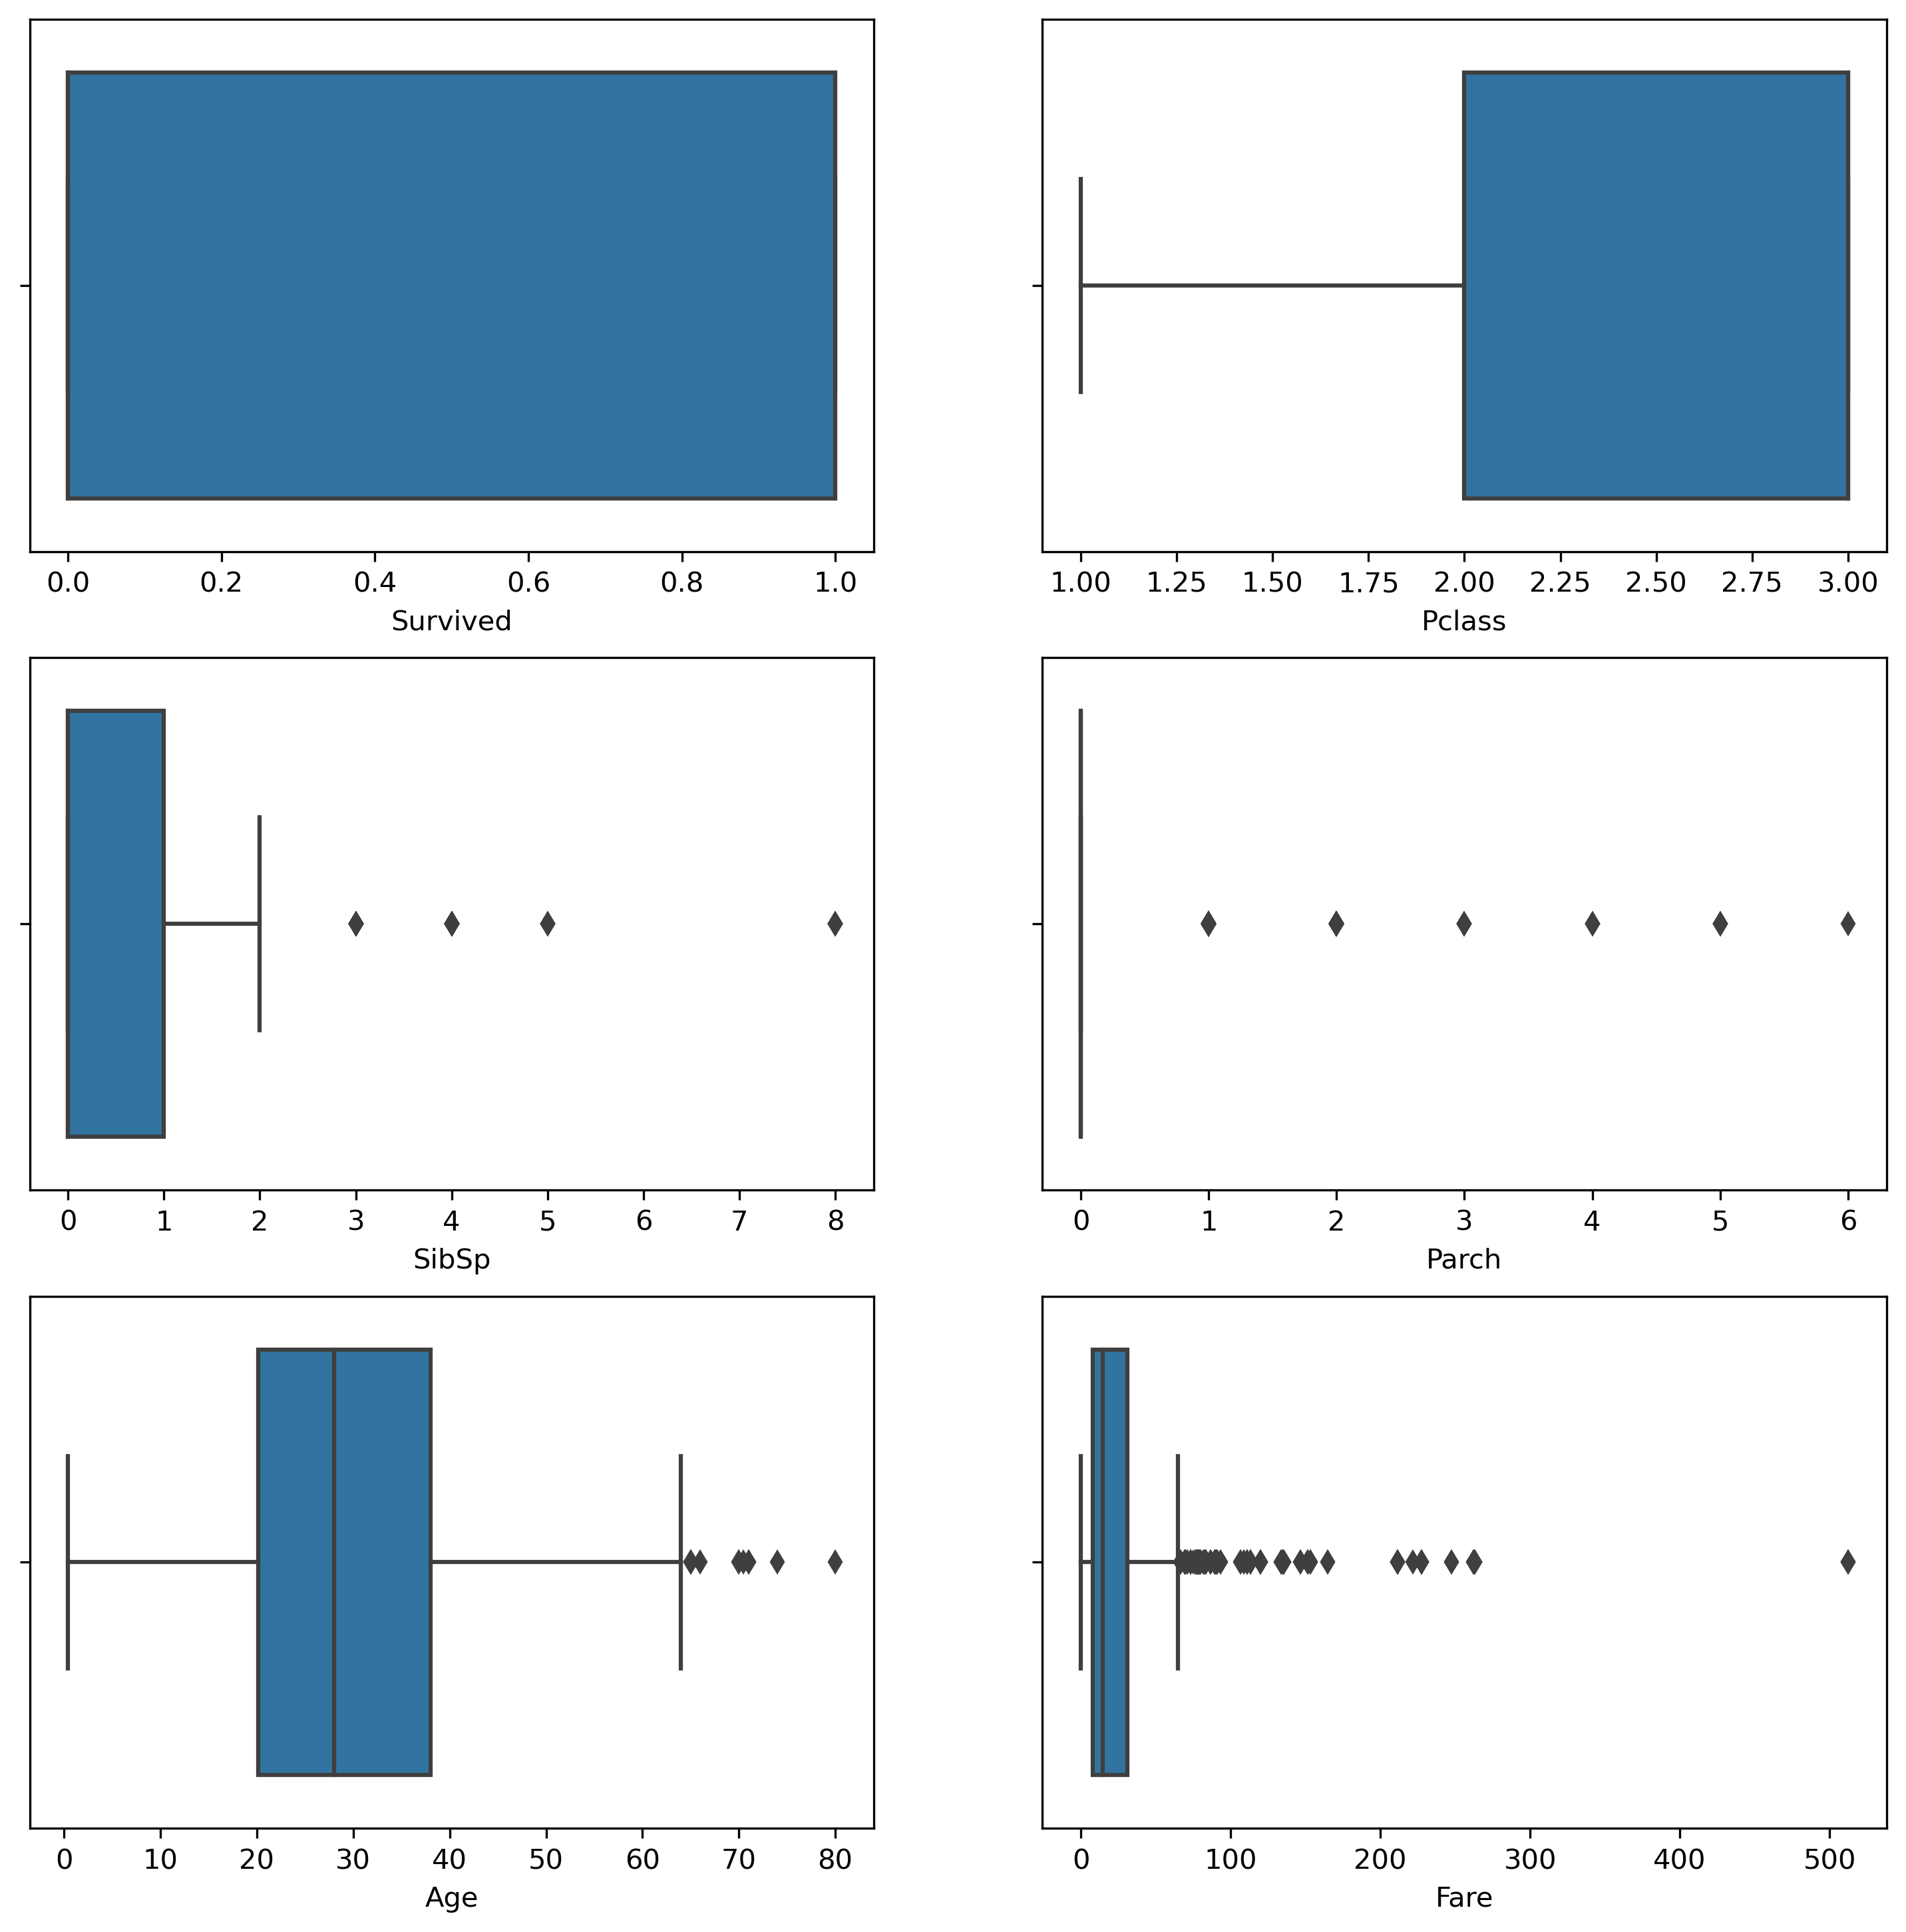

In [71]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=[12,12],dpi=300)
axes = axes.ravel()

for i in range(len(cols)):
    sns.boxplot(x=titanic[cols[i]],ax=axes[i])

plt.show()

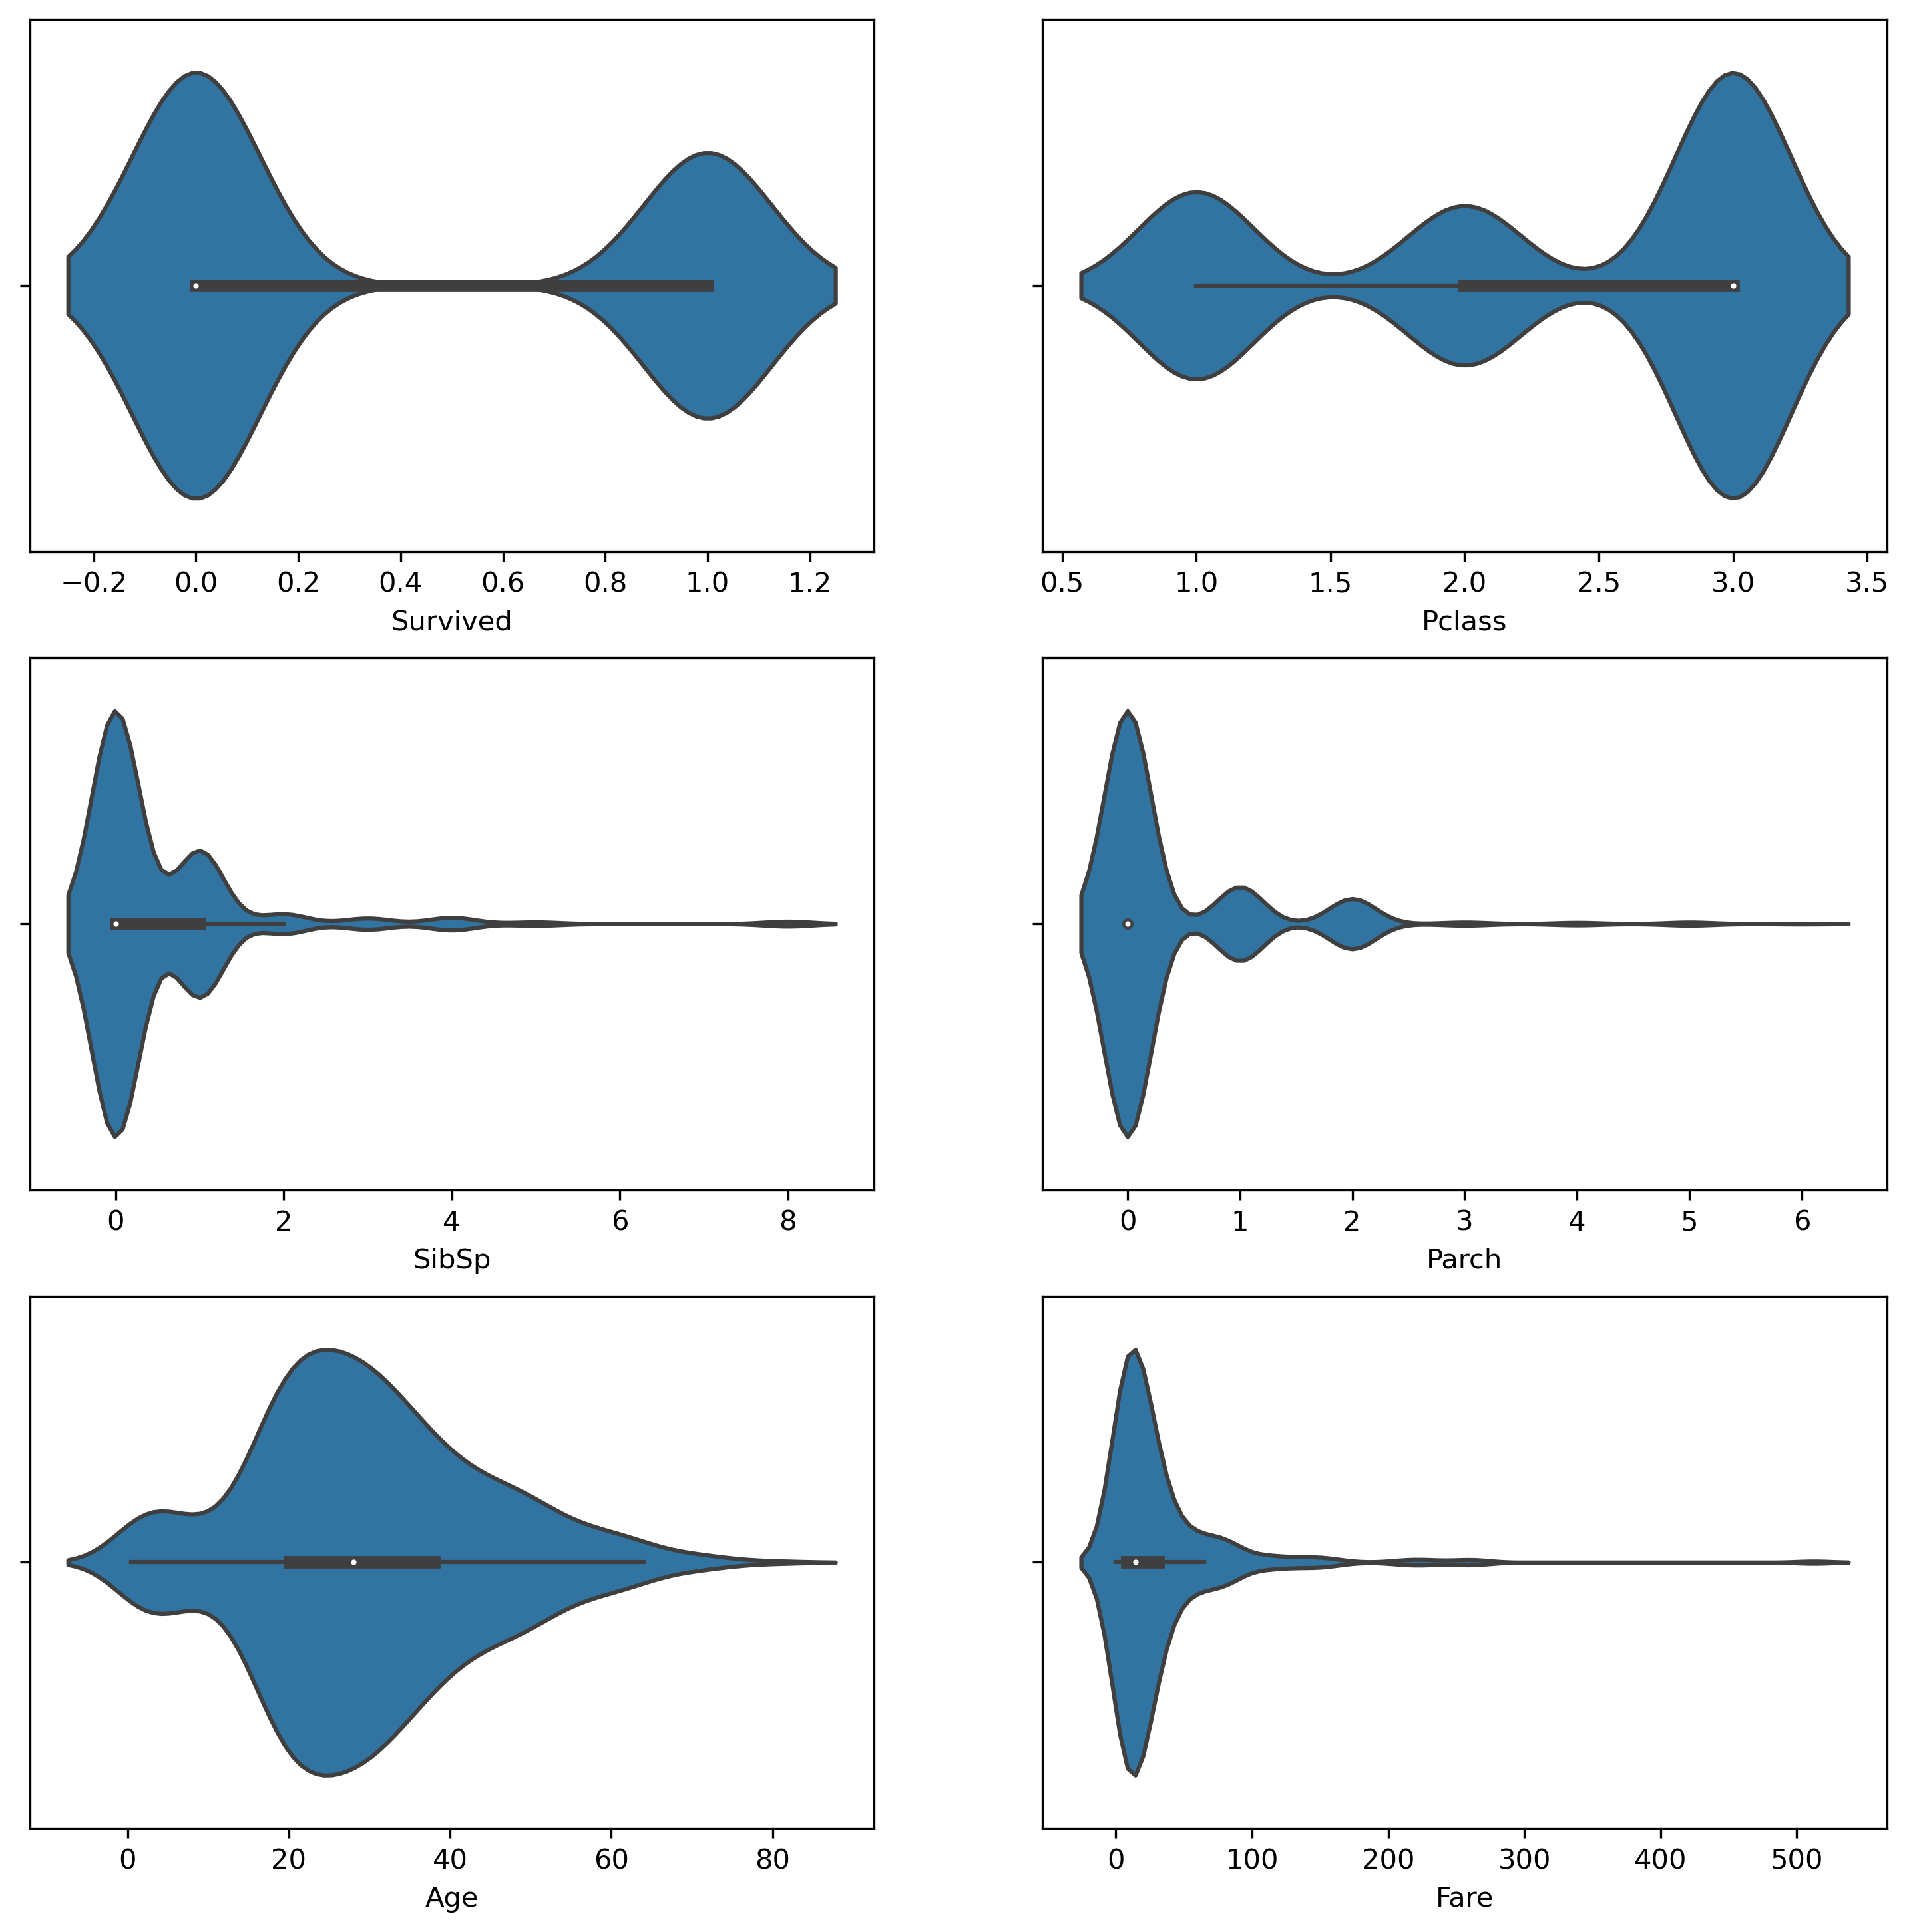

In [72]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=[12,12],dpi=300)
axes = axes.ravel()

for i in range(len(cols)):
    sns.violinplot(x=titanic[cols[i]],ax=axes[i])

plt.show()

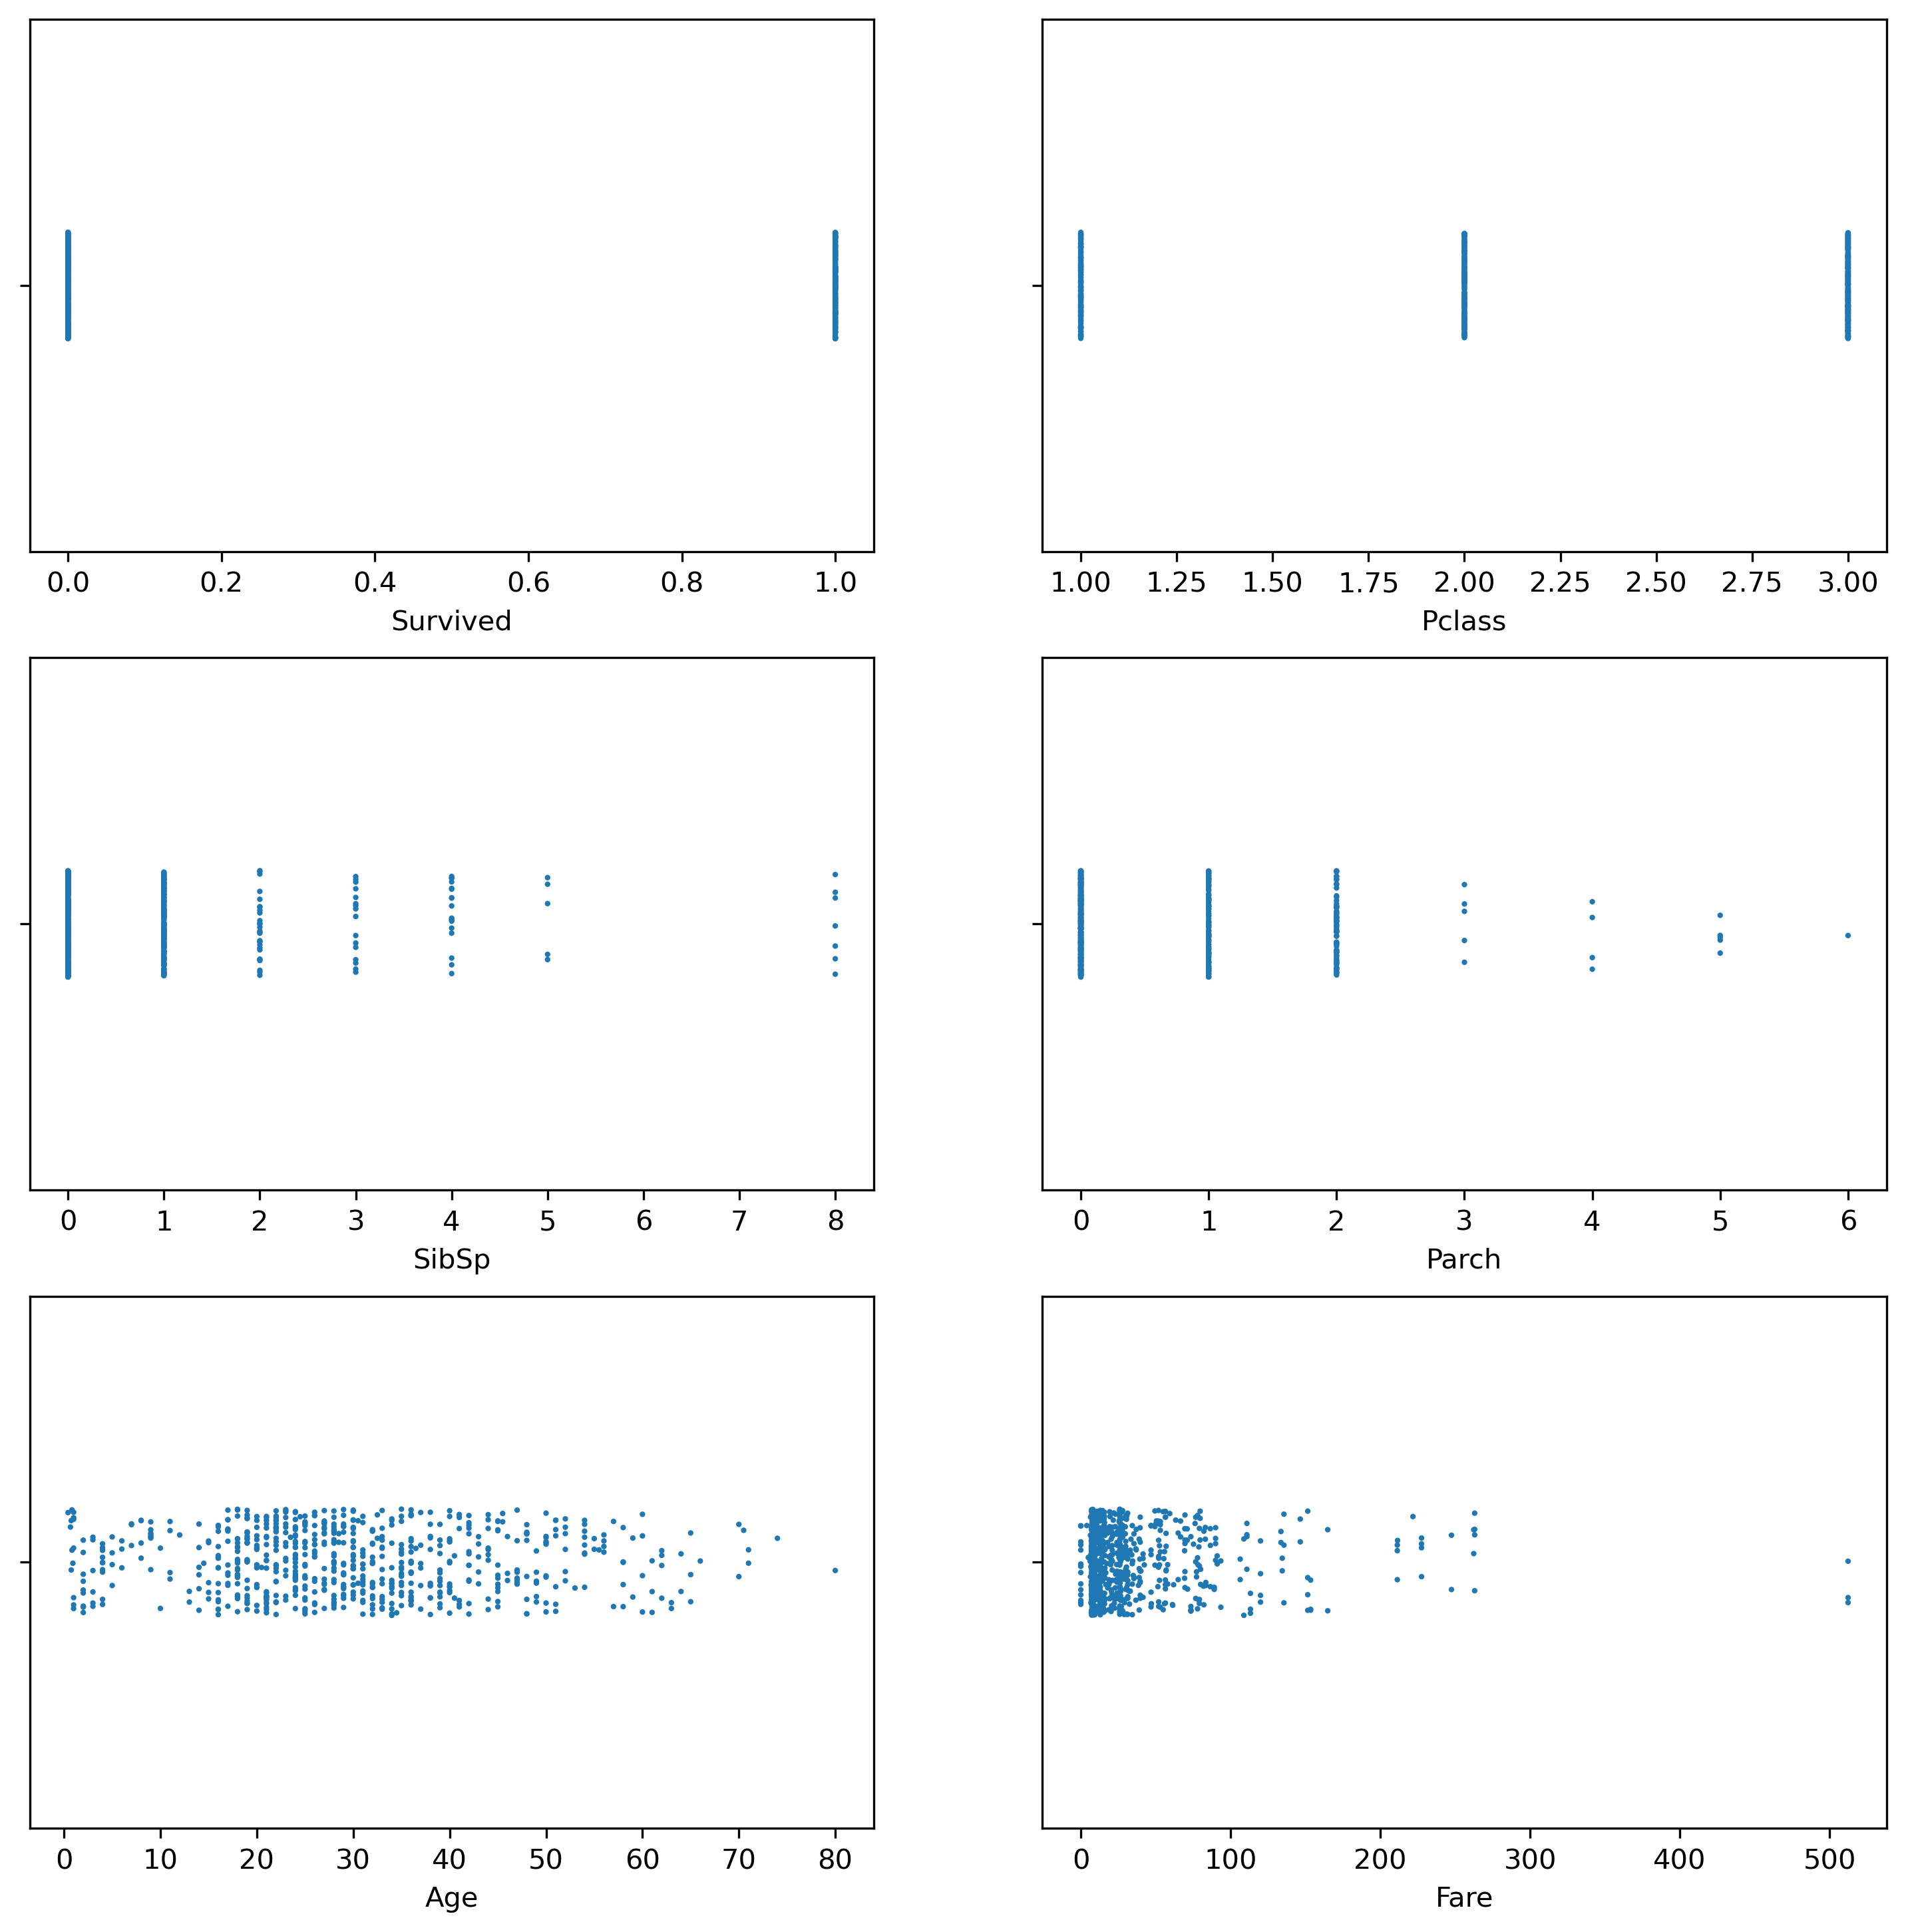

In [78]:
fig,axes = plt.subplots(nrows=3,ncols=2,figsize=[12,12],dpi=300)
axes = axes.ravel()

for i in range(len(cols)):
    sns.stripplot(x=titanic[cols[i]],ax=axes[i],size=2)

plt.show()

feature magnitude importent to know how feature data's range, scale and distribution.

In [80]:
titanic.describe().T


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292
